In [1]:
# import packages
import pandas as pd

# DATA PREPARATION

# IMDB

In [4]:
title_basics = pd.read_csv('../data/imdb.title.basics.tsv',sep ='\t')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\2655964513.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics = pd.read_csv('../data/imdb.title.basics.tsv',sep ='\t')


In [5]:
title_basics.to_csv('../data/imdb_raw_title.csv',index=False)

In [6]:
name_basics = pd.read_csv('../data/imdb.name.basics.tsv',sep ='\t')

In [7]:
name_basics.to_csv('../data/imdb_raw_name.csv',index=False)

In [8]:
principal_basics = pd.read_csv('../data/imdb.title.principals.tsv',sep ='\t')

In [9]:
principal_basics.to_csv('../data/imdb_raw_principal.csv',index=False)

In [10]:
crew_basics = pd.read_csv('../data/imdb.title.crew.tsv',sep ='\t')

In [11]:
crew_basics.to_csv('../data/imdb_raw_crew.csv',index=False)

## Crew Data

In [13]:
crew_basics = pd.read_csv('../data/imdb_raw_crew.csv')

In [14]:
crew_basics = crew_basics[['tconst','directors']]

In [15]:
crew_basics.isnull().any()

tconst       False
directors    False
dtype: bool

In [16]:
not_director = crew_basics.loc[crew_basics['directors'] == '\\N']

In [17]:
crew_basics.drop(not_director.index, inplace=True)

In [18]:
crew_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6447902 entries, 0 to 10385448
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
dtypes: object(2)
memory usage: 147.6+ MB


In [19]:
crew_basics.to_csv('../data/imdb_cleaned_crew_data.csv', index=False)

## Cast Name

In [21]:
name_basics = pd.read_csv('../data/imdb_raw_name.csv')

In [22]:
name_basics = name_basics[['nconst','primaryName']]

In [23]:
name_basics.isnull().any()

nconst         False
primaryName     True
dtype: bool

In [24]:
name_basics.dropna(axis=0,inplace=True)

In [25]:
null_value_name = name_basics.loc[name_basics['primaryName'] == '\\N']

In [26]:
name_basics.drop(null_value_name.index, inplace = True)

In [27]:
name_basics.to_csv('../data/imdb_cleaned_name_data.csv', index=False)

## Principal

In [29]:
principal_basics = pd.read_csv('../data/imdb_raw_principal.csv')

In [30]:
principal_basics = principal_basics[['tconst','ordering','nconst','category']]

In [31]:
principal_basics.isnull().any()

tconst      False
ordering    False
nconst      False
category    False
dtype: bool

In [32]:
principal_basics['category'].unique()

array(['self', 'director', 'producer', 'cinematographer', 'composer',
       'editor', 'actor', 'actress', 'writer', 'production_designer',
       'archive_footage', 'casting_director', 'archive_sound'],
      dtype=object)

In [33]:
principal_basics = principal_basics.loc[(principal_basics['category'] == 'actor') | (principal_basics['category'] == 'actress')]

In [34]:
principal_basics.to_csv('../data/imdb_cleaned_principal_data.csv', index=False)

## Title

In [36]:
title_basics = pd.read_csv('../data/imdb_raw_title.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\664917171.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics = pd.read_csv('../data/imdb_raw_title.csv')


In [37]:
title_basics = title_basics[['tconst','titleType','primaryTitle','startYear','genres']]

In [38]:
title_basics.isnull().any()

tconst          False
titleType       False
primaryTitle     True
startYear       False
genres           True
dtype: bool

In [39]:
title_basics.dropna(axis=0,inplace=True)

In [40]:
null_value_genres = title_basics.loc[title_basics['genres'] == '\\N']

In [41]:
title_basics.drop(null_value_genres.index, inplace = True)

In [42]:
null_value_startYear = title_basics.loc[title_basics['startYear'] == '\\N']

In [43]:
title_basics.drop(null_value_startYear.index, inplace = True)

In [44]:
adult_genre = title_basics.loc[(title_basics['genres'] == 'Adult') | (title_basics['genres'].str.contains('Adult', na=False))]

In [45]:
title_basics.drop(adult_genre.index, inplace = True)

In [46]:
title_basics['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvMovie', 'tvEpisode', 'tvSeries',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [47]:
valid_types = ['movie']

In [48]:
title_basics = title_basics[title_basics['titleType'].isin(valid_types)]

In [49]:
# Split genres into individual values and get unique genres
unique_genres = set(
    genre.strip()
    for genre_list in title_basics['genres']
    for genre in genre_list.split(',')
)

In [50]:
# Unique genres
print(unique_genres)

{'Documentary', 'Reality-TV', 'War', 'Western', 'Comedy', 'Mystery', 'Adventure', 'History', 'Sci-Fi', 'Fantasy', 'Film-Noir', 'Family', 'Horror', 'Action', 'Sport', 'Talk-Show', 'News', 'Thriller', 'Music', 'Game-Show', 'Drama', 'Musical', 'Crime', 'Animation', 'Biography', 'Romance'}


In [51]:
title_basics.to_csv('../data/imdb_cleaned_title_data.csv', index=False)

## Mapping IMDb datasets

In [53]:
crew_df = pd.read_csv('../data/imdb_cleaned_crew_data.csv')

In [54]:
title_df = pd.read_csv('../data/imdb_cleaned_title_data.csv')

In [55]:
name_df = pd.read_csv('../data/imdb_cleaned_name_data.csv')

In [56]:
df_merged = pd.merge(title_df, crew_df, left_on='tconst',right_on='tconst',how='left')

In [57]:
df_merged.isnull().any()

tconst          False
titleType       False
primaryTitle    False
startYear       False
genres          False
directors        True
dtype: bool

In [58]:
df_merged.dropna(axis=0, inplace=True)

In [59]:
df_merged = df_merged[['tconst','primaryTitle','startYear','genres','directors']]

In [60]:
df_merged = df_merged.rename(columns={'primaryTitle':'title','startYear':'release_year','directors':'director_id'})

In [61]:
# Split multiple director IDs into separate rows
df_merged_expanded = df_merged.assign(director_id=df_merged['director_id'].str.split(',')).explode('director_id')

In [62]:
# Merge with name_df to get director names
df_merged_with_names = pd.merge(df_merged_expanded, name_df, left_on='director_id', right_on='nconst', how='left')

In [63]:
# Group back to aggregate directors for movies with multiple directors
df_final = df_merged_with_names.groupby(['tconst', 'title'], as_index=False).agg({
    'release_year': 'first',  # Retain the first release year
    'genres': 'first',        # Retain the first genres value
    'director_id': lambda x: ','.join(x.dropna()),  # Recombine IDs
    'primaryName': lambda x: ', '.join(x.dropna())  # Combine names
})

In [64]:
# Rename columns for clarity
df_final = df_final.rename(columns={
    'director_id': 'director_ids',
    'primaryName': 'director_names'
})

In [65]:
df_final.to_csv('../data/imdb_mapping_director_data.csv',index=False)

# TMDB

In [67]:
df = pd.read_csv('../data/tmdb_raw_data.csv')

In [68]:
df = df[['imdb_id','title','adult','budget','release_date','production_companies','production_countries','spoken_languages']]

In [69]:
df.loc[df['adult'] == True]

,imdb_id,title,adult,budget,release_date,production_companies,production_countries,spoken_languages
7684,NaN,Barely Legal Baby Fat,True,0,2008-06-26,Hustler Video,NaN,English
11393,NaN,Prison High Pressure,True,0,2019-03-07,Marc Dorcel,France,French
13042,tt1171551,Hot Chocolate: A Romp in the Dark,True,0,2008-01-08,Wicked Pictures,United States of America,English
13115,tt3094816,Diet of Sex,True,0,2014-02-14,KeyAtomics,Spain,"German, Spanish"
14465,tt0110214,Tarzan-X: Shame of Jane,True,0,1995-06-16,"Capital Film (Porno), Butterfly Motion Pictures",Italy,"English, Italian"
...,...,...,...,...,...,...,...,...
1160424,tt6154650,Thirty Cock Titty Fuck in Large Orgies JULIA,True,0,2016-02-01,MOODYZ,Japan,Japanese
1160468,tt0190716,Robofox,True,0,1987-01-01,NaN,NaN,NaN
1160469,tt0143374,Lethal Passion,True,0,1992-01-01,NaN,NaN,NaN
1160489,NaN,Büyük Günahlar,True,0,NaN,NaN,NaN,NaN


In [70]:
adult_true = df.loc[df['adult'] == True]

In [71]:
df = df.drop(adult_true.index)

In [72]:
df.loc[df['budget'] == 0]

,imdb_id,title,adult,budget,release_date,production_companies,production_countries,spoken_languages
258,tt5311514,Your Name.,False,0,2016-08-26,"CoMix Wave Films, TOHO, KADOKAWA, East Japan M...",Japan,Japanese
375,tt10886166,365 Days,False,0,2020-02-07,"Ekipa, Future Space, Next Film, TVN Group",Poland,"English, French, Italian, Polish"
395,tt3846674,To All the Boys I've Loved Before,False,0,2018-08-16,"Awesomeness Films, Overbrook Entertainment",United States of America,English
509,tt3799232,The Kissing Booth,False,0,2018-05-11,Komixx Entertainment,United Kingdom,English
652,tt1638002,"Love, Rosie",False,0,2014-10-16,"Constantin Film, Octagon Films, Canyon Creek F...","Belgium, Canada, Germany, Ireland, United Kingdom",English
...,...,...,...,...,...,...,...,...
1160492,NaN,Triplet,False,0,2020-09-16,NaN,Russia,Russian
1160494,tt14740618,A New Country,False,0,2020-08-23,Anaphora Films,South Africa,NaN
1160495,tt5338278,Skorokoro,False,0,2016-06-13,NaN,South Africa,"English, Sotho"
1160496,NaN,Black Coat,False,0,2020-08-19,NaN,Russia,Russian


In [73]:
no_budget = df.loc[df['budget'] == 0]

In [74]:
df = df.drop(no_budget.index)

In [75]:
df = df.dropna(subset=['budget'])

In [76]:
df = df.dropna(subset=['release_date'])

In [77]:
# Extract the year from the release_date column (as a string)
df['release_year'] = df['release_date'].str[:4]

In [78]:
df = df[['imdb_id','title','release_year','budget','production_companies','production_countries','spoken_languages']]

In [79]:
df = df.dropna(subset = ['imdb_id'])

In [80]:
df['release_year'] = df['release_year'].astype(int)

In [81]:
movies_after_2024 = df.loc[df['release_year'] > 2024]

In [82]:
df.drop(movies_after_2024.index, inplace=True)

In [83]:
movies_before_1970 = df.loc[df['release_year'] < 1970]

In [84]:
df.drop(movies_before_1970.index, inplace=True)

In [85]:
df = df.dropna(subset=['spoken_languages'])

In [86]:
df.loc[df['spoken_languages'].str.contains('English')]

,imdb_id,title,release_year,budget,production_companies,production_countries,spoken_languages
0,tt1375666,Inception,2010,160000000,"Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,tt0816692,Interstellar,2014,165000000,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,tt0468569,The Dark Knight,2008,185000000,"DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,tt0499549,Avatar,2009,237000000,"Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,tt0848228,The Avengers,2012,220000000,Marvel Studios,United States of America,"English, Hindi, Russian"
...,...,...,...,...,...,...,...
1160025,tt10315034,Lonely Hearts,2020,10000,Cary Allen Productions,United States of America,English
1160261,tt13628822,Kate & Jake,2023,6900,"Asterisk* Productions, Love Apple Motion Pictu...",United Kingdom,English
1160422,tt10953618,Variations,2020,2000,NaN,United States of America,English
1160440,tt11271040,On This Hallowed Ground,2019,70000,NaN,NaN,English


In [87]:
df = df.loc[df['spoken_languages'].str.contains('English', na=False)]

In [88]:
df = df.loc[df['production_countries'].str.contains('United States of America|United Kingdom', na=False)]

In [89]:
df = df[['imdb_id','title','release_year','budget','production_companies','production_countries','spoken_languages']]

In [90]:
df.to_csv('../data/tmdb_cleaned_data.csv', index=False)

# Director Gender Benchmark

In [92]:
df1 = pd.read_csv('../data/index_30_best_movies_directed_by_female_filmmakers.csv')

In [93]:
# Split the 'director_name' column by commas
df1['director_name'] = df1['director_name'].str.split(',')

In [94]:
# Explode the list into separate rows
df1 = df1.explode('director_name', ignore_index=True)

In [95]:
# Clean up each name (lowercase and remove special characters)
df1['director_name'] = df1['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [96]:
df1 = df1[['director_name']]

In [97]:
df2 = pd.read_csv('../data/index_50_greatest_female_directors.csv')

In [98]:
df2 = df2[['Const','Name']]

In [99]:
df2['Name'] = df2['Name'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [100]:
df2 = df2.rename(columns={'Name':'director_name'})

In [101]:
df2 = df2[['director_name']]

In [102]:
df3 = pd.read_csv('../data/index_100_all_time_greatest_films_directed_by_women.csv')

In [103]:
df3 = df3[['Directors']]

In [104]:
df3 = df3.rename(columns={'Directors':'director_name'})

In [105]:
# Split the 'director_name' column by commas
df3['director_name'] = df3['director_name'].str.split(',')

In [106]:
# Explode the list into separate rows
df3 = df3.explode('director_name', ignore_index=True)

In [107]:
# Clean up each name (lowercase and remove special characters)
df3['director_name'] = df3['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [108]:
df4 = pd.read_csv('../data/index_197_female_directors.csv')

In [109]:
df4 = df4[['Name']]

In [110]:
df4 = df4.rename(columns={'Name':'director_name'})

In [111]:
# Split the 'director_name' column by commas
df4['director_name'] = df4['director_name'].str.split(',')

In [112]:
# Explode the list into separate rows
df4 = df4.explode('director_name', ignore_index=True)

In [113]:
# Clean up each name (lowercase and remove special characters)
df4['director_name'] = df4['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [114]:
df5 = pd.read_csv('../data/index_bbc_raw_data.csv')

In [115]:
df5 = df5[['director_name']]

In [116]:
# Split the 'director_name' column by commas
df5['director_name'] = df5['director_name'].str.split(',')

In [117]:
# Explode the list into separate rows
df5 = df5.explode('director_name', ignore_index=True)

In [118]:
# Clean up each name (lowercase and remove special characters)
df5['director_name'] = df5['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [119]:
df6 = pd.read_csv('../data/index_billboard_raw_data.csv')

In [120]:
df6 = df6[['director_name']]

In [121]:
# Split the 'director_name' column by commas
df6['director_name'] = df6['director_name'].str.split(',')

In [122]:
# Explode the list into separate rows
df6 = df6.explode('director_name', ignore_index=True)

In [123]:
# Clean up each name (lowercase and remove special characters)
df6['director_name'] = df6['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [124]:
df7 = pd.read_csv('../data/index_indiewire_raw_data.csv')

In [125]:
df7 = df7[['director_name']]

In [126]:
# Split the 'director_name' column by commas
df7['director_name'] = df7['director_name'].str.split(',')

In [127]:
# Explode the list into separate rows
df7 = df7.explode('director_name', ignore_index=True)

In [128]:
# Clean up each name (lowercase and remove special characters)
df7['director_name'] = df7['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [129]:
df8 = pd.read_csv('../data/index_rotten_tomatoes_raw_data.csv')

In [130]:
df8 = df8[['director']]

In [131]:
df8 = df8.rename(columns={'director':'director_name'})

In [132]:
# Split the 'director_name' column by commas
df8['director_name'] = df8['director_name'].str.split(',')

In [133]:
# Explode the list into separate rows
df8 = df8.explode('director_name', ignore_index=True)

In [134]:
# Clean up each name (lowercase and remove special characters)
df8['director_name'] = df8['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [135]:
df9 = pd.read_csv('../data/index_top_30_female_directed_movies_of_all_time.csv')

In [136]:
df9 = df9[['director_name']]

In [137]:
# Split the 'director_name' column by commas
df9['director_name'] = df9['director_name'].str.split(',')

In [138]:
# Explode the list into separate rows
df9 = df9.explode('director_name', ignore_index=True)

In [139]:
# Clean up each name (lowercase and remove special characters)
df9['director_name'] = df9['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [140]:
df10 = pd.read_csv('../data/index_wiki_raw_data.csv')

In [141]:
# Split the 'director_name' column by commas
df10['director_name'] = df10['director_name'].str.split(',')

In [142]:
# Explode the list into separate rows
df10 = df10.explode('director_name', ignore_index=True)

In [143]:
# Clean up each name (lowercase and remove special characters)
df10['director_name'] = df10['director_name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [144]:
# Assuming df1 to df10 are already defined
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]  # List of DataFrames

In [145]:
# Concatenate all DataFrames into one
df_final = pd.concat(dfs, ignore_index=True)

In [146]:
# Remove duplicate rows based on the 'director_name' column
df_final = df_final.drop_duplicates(subset='director_name', keep='first')

In [147]:
df_final.to_csv('../data/index_director_gender.csv',index=False)

# Oscar

In [149]:
oscar = pd.read_csv('../data/oscar_award_raw_data.csv')

In [150]:
oscar['category'].unique()

array(['ACTOR', 'ACTRESS', 'ART DIRECTION', 'CINEMATOGRAPHY',
       'DIRECTING (Comedy Picture)', 'DIRECTING (Dramatic Picture)',
       'ENGINEERING EFFECTS', 'OUTSTANDING PICTURE',
       'UNIQUE AND ARTISTIC PICTURE', 'WRITING (Adaptation)',
       'WRITING (Original Story)', 'WRITING (Title Writing)',
       'SPECIAL AWARD', 'DIRECTING', 'WRITING', 'OUTSTANDING PRODUCTION',
       'SOUND RECORDING', 'SHORT SUBJECT (Cartoon)',
       'SHORT SUBJECT (Comedy)', 'SHORT SUBJECT (Novelty)',
       'ASSISTANT DIRECTOR', 'FILM EDITING', 'MUSIC (Scoring)',
       'MUSIC (Song)', 'DANCE DIRECTION', 'WRITING (Screenplay)',
       'ACTOR IN A SUPPORTING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'SHORT SUBJECT (Color)', 'SHORT SUBJECT (One-reel)',
       'SHORT SUBJECT (Two-reel)', 'IRVING G. THALBERG MEMORIAL AWARD',
       'MUSIC (Original Score)', 'CINEMATOGRAPHY (Black-and-White)',
       'CINEMATOGRAPHY (Color)', 'SPECIAL EFFECTS',
       'ART DIRECTION (Black-and-White)', 'ART DIRECT

In [151]:
oscar = oscar.loc[(oscar['category'] == 'ACTOR') | (oscar['category'] == 'ACTRESS') | (oscar['category'] == 'ACTOR IN A SUPPORTING ROLE') | (oscar['category'] == 'ACTRESS IN A SUPPORTING ROLE') | (oscar['category'] == 'ACTOR IN A LEADING ROLE') | (oscar['category'] == 'ACTRESS IN A LEADING ROLE')]

In [152]:
oscar['winner'] = oscar['winner'].astype(str)

In [153]:
oscar = oscar.loc[oscar['winner'].str.contains('True')]

In [154]:
oscar.to_csv('../data/oscar_award_cleaned_data.csv',index=False)

# DATA TRANSFORMATION

In [156]:
movie_raw_data_df = pd.read_csv('../data/the_number_40000_movie_raw_data.csv')

In [157]:
movie_raw_data_df = movie_raw_data_df[['title','year','domestic_gross']]

In [158]:
movie_raw_data_df = movie_raw_data_df.rename(columns={'year': 'release_year'})

In [159]:
movie_raw_data_df['domestic_gross'] = movie_raw_data_df['domestic_gross'].replace({'\$':'',',':''}, regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\2052015869.py:1: SyntaxWarning: invalid escape sequence '\$'
  movie_raw_data_df['domestic_gross'] = movie_raw_data_df['domestic_gross'].replace({'\$':'',',':''}, regex=True).astype(float)


In [160]:
# Erase null values
null_domestic = movie_raw_data_df.loc[movie_raw_data_df['domestic_gross'] == 0]

In [161]:
movie_raw_data_df.drop(null_domestic.index, inplace = True)

In [162]:
non_domestic_gross = movie_raw_data_df.loc[movie_raw_data_df['domestic_gross'].isnull()]

In [163]:
movie_raw_data_df.drop(non_domestic_gross.index, inplace=True)

In [164]:
movie_raw_data_df.sort_values(by='release_year',ascending=True)

,title,release_year,domestic_gross
28593,Le Voyage dans la Lune,1902,45353.0
7489,The Birth of a Nation,1915,10000000.0
8568,"20,000 Leagues Under the Sea",1916,8000000.0
11918,Over the Hill to the Poorhouse,1920,3000000.0
8100,The Four Horsemen of the Apocalypse,1921,9200000.0
...,...,...,...
15012,The Damned,2025,1252282.0
24470,From Ground Zero,2025,115246.0
12448,Game Changer,2025,2060000.0
5073,Den of Thieves 2: Pantera,2025,18722992.0


In [165]:
movies_after_2024 = movie_raw_data_df.loc[movie_raw_data_df['release_year'] > 2024]

In [166]:
movie_raw_data_df.drop(movies_after_2024.index, inplace=True)

In [167]:
movies_before_1970 = movie_raw_data_df.loc[movie_raw_data_df['release_year'] < 1970]

In [168]:
movie_raw_data_df.drop(movies_before_1970.index, inplace=True)

## FRANCHISE REMOVAL

In [170]:
the_numbers_franchise_df = pd.read_csv('../data/the_number_franchise_details.csv')

In [171]:
the_numbers_franchise_df['release_year'] = the_numbers_franchise_df['release_date'].str.extract(r'(\d{4})')

In [172]:
no_domestic_gross = the_numbers_franchise_df[the_numbers_franchise_df['domestic_gross'].isnull()]

In [173]:
the_numbers_franchise_df.drop(no_domestic_gross.index, inplace=True)

In [174]:
the_numbers_franchise_df = the_numbers_franchise_df[['title','release_year']]

In [175]:
the_numbers_franchise_df.dropna(inplace=True)

In [176]:
the_numbers_franchise_df['release_year'] = the_numbers_franchise_df['release_year'].astype(int) 

In [177]:
franchises_before_1970 = the_numbers_franchise_df.loc[the_numbers_franchise_df['release_year'] < 1970]

In [178]:
the_numbers_franchise_df.drop(franchises_before_1970.index, inplace=True)

In [179]:
franchises_after_2024 = the_numbers_franchise_df.loc[the_numbers_franchise_df['release_year'] > 2024]

In [180]:
the_numbers_franchise_df.drop(franchises_after_2024.index, inplace=True)

In [181]:
the_numbers_franchise_df = the_numbers_franchise_df[['title']]

In [182]:
the_numbers_franchise_df[the_numbers_franchise_df['title'].str.endswith('…', na=False)]

,title
10,Ant-Man and the Wasp: Quant…
14,Doctor Strange in the Multi…
17,Shang-Chi and the Legend of…
33,Captain America: The Winter…
37,Captain America: The First …
...,...
2297,After Dark HorrorFest 2007:…
2298,After Dark HorrorFest 2006:…
2306,Legend of Deification (姜子牙)…
2324,Ghost in the Shell 2: Innoc…


In [183]:
uncompleted_titles = the_numbers_franchise_df[the_numbers_franchise_df['title'].str.endswith('…', na=False)]

In [184]:
uncompleted_titles.to_csv('../data/uncompleted_titles.csv',index=False)

In [185]:
the_numbers_franchise_df.drop(uncompleted_titles.index, inplace=True)

In [186]:
# Load the corrected titles
corrected_titles = pd.read_csv("../data/uncompleted_titles_fixed.csv", encoding="latin-1")

In [187]:
corrected_titles.to_csv("../data/uncompleted_titles_fixed_utf8.csv", encoding="utf-8", index=False)

In [188]:
corrected_titles_utf_8 = pd.read_csv("../data/uncompleted_titles_fixed_utf8.csv", encoding="latin-1")

In [189]:
# Re-add them to the main DataFrame
franchise_details_df = pd.concat([the_numbers_franchise_df, corrected_titles_utf_8], ignore_index=True)

In [190]:
# Get all franchise movie titles
franchise_titles = set(franchise_details_df['title'].dropna().str.strip())

In [191]:
# Remove rows from movie_raw_data_df if the title exists in franchise_titles
filtered_movie_raw_data_df = movie_raw_data_df[~movie_raw_data_df['title'].str.strip().isin(franchise_titles)]

In [192]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Pirates of the Caribbean", case=False, na=False)
]

In [193]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Spider-Man", case=False, na=False)
]

In [194]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("The Lord of the Rings", case=False, na=False)
]

In [195]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Harry Potter", case=False, na=False)
]

In [196]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("The Hunger Games", case=False, na=False)
]

In [197]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Mission: Impossible", case=False, na=False)
]

In [198]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Twilight Saga", case=False, na=False)
]

In [199]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Tyler Perry", case=False, na=False)
]

In [200]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("National Lampoon", case=False, na=False)
]

In [201]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Alvin and the Chipmunks", case=False, na=False)
]

In [202]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("The Chronicles of", case=False, na=False)
]

In [203]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("LEGO", case=False, na=False)
]

In [204]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("How to Train Your Dragon", case=False, na=False)
]

In [205]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Naked Gun", case=False, na=False)
]

In [206]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("John Wick", case=False, na=False)
]

In [207]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Fantastic Four", case=False, na=False)
]

In [208]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Texas Chainsaw", case=False, na=False)
]

In [209]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Percy", case=False, na=False)
]

In [210]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Hitman", case=False, na=False)
]

In [211]:
filtered_movie_raw_data_df = filtered_movie_raw_data_df[
    ~filtered_movie_raw_data_df['title'].str.contains("Demon Slayer", case=False, na=False)
]

In [212]:
filtered_movie_raw_data_df['release_year'] = filtered_movie_raw_data_df['release_year'].astype(str)

## ADJUSTED INFLATION

In [214]:
consumer_price_index = pd.read_csv('../data/consumer_price_index.csv')

In [215]:
consumer_price_index.dropna(axis=0, inplace=True)

In [216]:
consumer_price_index['rate_of_inflation'] = consumer_price_index['rate_of_inflation'].replace({'%':''}, regex=True) 

In [217]:
consumer_price_index['year'] = consumer_price_index['year'].astype(str) 

In [218]:
adjusted_df = pd.merge(filtered_movie_raw_data_df, consumer_price_index, left_on = 'release_year', right_on = 'year', how = 'left')

In [219]:
adjusted_df['release_year'] = adjusted_df['release_year'].astype(int) 

In [220]:
adjusted_df.sort_values(by='release_year',ascending=False)

,title,release_year,domestic_gross,year,cpi,rate_of_inflation
717,Kalki 2898-AD,2024,18289575.0,2024,314.4,3.2
11910,Popular Theory,2024,38781.0,2024,314.4,3.2
11877,In the Summers,2024,89015.0,2024,314.4,3.2
11887,Fitting In,2024,87995.0,2024,314.4,3.2
14539,Zurawski vs. Texas,2024,12830.0,2024,314.4,3.2
...,...,...,...,...,...,...
15565,THX 1138,1970,5000.0,1970,38.8,5.8
13447,Memorias del subdesarrollo,1970,29647.0,1970,38.8,5.8
4973,Beyond the Valley of the Dolls,1970,9000000.0,1970,38.8,5.8
7236,The Molly Maguires,1970,2200000.0,1970,38.8,5.8


In [221]:
adjusted_df.dropna(axis=0, inplace=True)

In [222]:
# Get the CPI for the latest year in the dataset (2024)
latest_year_cpi = adjusted_df.loc[adjusted_df['release_year'] == adjusted_df['release_year'].max(), 'cpi'].values[0]

In [223]:
latest_year_cpi

314.4

In [224]:
# Calculate adjusted values
adjusted_df['adjusted_domestic_gross'] = adjusted_df['domestic_gross'] * (latest_year_cpi / adjusted_df['cpi'])

In [225]:
adjusted_df = adjusted_df[['title','release_year','adjusted_domestic_gross']]

In [226]:
adjusted_df.sort_values(by='release_year',ascending=False)

,title,release_year,adjusted_domestic_gross
717,Kalki 2898-AD,2024,1.828958e+07
11910,Popular Theory,2024,3.878100e+04
11877,In the Summers,2024,8.901500e+04
11887,Fitting In,2024,8.799500e+04
14539,Zurawski vs. Texas,2024,1.283000e+04
...,...,...,...
15565,THX 1138,1970,4.051546e+04
13447,Memorias del subdesarrollo,1970,2.402324e+05
4973,Beyond the Valley of the Dolls,1970,7.292784e+07
7236,The Molly Maguires,1970,1.782680e+07


In [227]:
adjusted_df.to_csv('../data/the_number_movie_cleaned_data.csv', index = False)

## STAR POWER

In [229]:
leading_star = pd.read_csv('../data/the_number_leading_cast_raw_data.csv')

In [230]:
leading_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            9900 non-null   object
 1   domestic_gross  9900 non-null   object
 2   num_movies      9900 non-null   int64 
 3   avg_gross       9900 non-null   object
dtypes: int64(1), object(3)
memory usage: 309.5+ KB


In [231]:
supporting_star = pd.read_csv('../data/the_number_supporting_cast_raw_data.csv')

In [232]:
supporting_star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70100 entries, 0 to 70099
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            70100 non-null  object
 1   domestic_gross  70100 non-null  object
 2   num_movies      70100 non-null  int64 
 3   avg_gross       70100 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [233]:
# remove $ and ,
leading_star['domestic_gross'] = leading_star['domestic_gross'].replace({'\$':'',',':''}, regex=True).astype(float)
leading_star['avg_gross'] = leading_star['avg_gross'].replace({'\$':'',',':''},regex=True).astype(float)
supporting_star['domestic_gross'] = supporting_star['domestic_gross'].replace({'\$':'',',':''}, regex=True).astype(float)
supporting_star['avg_gross'] = supporting_star['avg_gross'].replace({'\$':'',',':''},regex=True).astype(float) 

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\3466641694.py:2: SyntaxWarning: invalid escape sequence '\$'
  leading_star['domestic_gross'] = leading_star['domestic_gross'].replace({'\$':'',',':''}, regex=True).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\3466641694.py:3: SyntaxWarning: invalid escape sequence '\$'
  leading_star['avg_gross'] = leading_star['avg_gross'].replace({'\$':'',',':''},regex=True).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11060\3466641694.py:4: SyntaxWarning: invalid escape sequence '\$'
  supporting_star['domestic_gross'] = supp

In [234]:
# lower case
supporting_star['name'] = supporting_star['name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True) 
leading_star['name'] = leading_star['name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True) 

In [235]:
# combine data set
combined_df = pd.concat([leading_star,supporting_star])
combined_df

,name,domestic_gross,num_movies,avg_gross
0,samuel l jackson,5.849181e+09,68,86017374.0
1,robert downey jr,5.474546e+09,45,121656581.0
2,chris pratt,5.354886e+09,26,205957147.0
3,scarlett johansson,5.337687e+09,34,156990792.0
4,tom hanks,5.170020e+09,56,92321778.0
...,...,...,...,...
70095,almir mehic,3.163000e+03,1,3163.0
70096,milan strljic,3.163000e+03,1,3163.0
70097,mirza tanovic,3.163000e+03,1,3163.0
70098,mario kenezovic,3.163000e+03,1,3163.0


In [236]:
# aggregate data for each cast
final_df = combined_df.groupby('name',as_index=False).agg({
    'domestic_gross':'sum',
    'num_movies':'sum'
})

In [237]:
final_df['avg_gross'] = final_df['domestic_gross']/final_df['num_movies']

In [238]:
final_df.duplicated().any()

False

In [239]:
final_df.to_csv('../data/the_number_cast_cleaned_data.csv', index = False)

# MAPPING DATASETS TOGETHER

In [241]:
imdb_df = pd.read_csv('../data/imdb_mapping_director_data.csv')

In [242]:
the_numbers_movie_df = pd.read_csv('../data/the_number_movie_cleaned_data.csv')

In [243]:
tmdb_df = pd.read_csv('../data/tmdb_cleaned_data.csv')

In [244]:
the_numbers_movie_df['title'] = the_numbers_movie_df['title'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [245]:
the_numbers_movie_df['title'] = the_numbers_movie_df['title'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [246]:
the_numbers_movie_df['release_year'] = the_numbers_movie_df['release_year'].astype(str)

In [247]:
imdb_df['title'] = imdb_df['title'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [248]:
imdb_df['title'] = imdb_df['title'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [249]:
imdb_df['director_names'] = imdb_df['director_names'].astype(str)

In [250]:
imdb_df['release_year'] = imdb_df['release_year'].astype(str)

In [251]:
imdb_df['director_names'] = imdb_df['director_names'].apply(
    lambda x: ','.join([name.strip().lower() for name in x.split(',')])
)

In [252]:
imdb_df = imdb_df[['tconst','title','release_year','genres','director_ids','director_names']]

In [253]:
# Extract unique movie titles from the_numbers_movie_df
valid_titles = set(the_numbers_movie_df["title"].unique())

In [254]:
imdb_df['release_year'] = imdb_df['release_year'].astype(int)

In [255]:
imdb_df = imdb_df.loc[(imdb_df['release_year'] >= 1970) & (imdb_df['release_year'] <= 2024)]

In [256]:
imdb_df = imdb_df.sort_values(by='release_year',ascending=False)

In [257]:
# Filter imdb_df to keep only movies that are in the_numbers_movie_df
imdb_df = imdb_df[imdb_df["title"].isin(valid_titles)].reset_index(drop=True)

In [258]:
imdb_df['release_year'] = imdb_df['release_year'].astype(str)

In [259]:
# Merge imdb_df with the_numbers_movie_df based on both title and release_year
final_df = pd.merge(
    imdb_df,
    the_numbers_movie_df,
    on=['title', 'release_year'],  # Match on both title and release_year
    how='left'  # Keep all imdb_df entries and merge available matches
)

In [260]:
final_df = final_df.dropna(subset=['adjusted_domestic_gross'])

In [261]:
# Merge imdb_df with the_numbers_movie_df based on both title and release_year
final_df = pd.merge(
    tmdb_df,
    final_df,
    left_on = ['imdb_id'],
    right_on = ['tconst'],
    how='left'  # Keep all imdb_df entries and merge available matches
)

In [262]:
final_df = final_df.dropna(subset=['adjusted_domestic_gross'])

In [263]:
final_df = final_df[['tconst','title_y','release_year_y','genres','budget','director_ids','director_names','adjusted_domestic_gross',
                     'production_companies','production_countries','spoken_languages']]

In [264]:
final_df = final_df.rename(columns = {'title_y':'title','release_year_y':'release_year'})

In [265]:
duplicates = final_df[final_df.duplicated(subset=['title', 'tconst'], keep=False)]

In [266]:
final_df.drop(duplicates.index,inplace=True)

In [267]:
# Reset index for cleanliness
final_df.reset_index(drop=True, inplace=True)

In [268]:
final_df.isnull().any()

tconst                     False
title                      False
release_year               False
genres                     False
budget                     False
director_ids               False
director_names             False
adjusted_domestic_gross    False
production_companies        True
production_countries       False
spoken_languages           False
dtype: bool

In [269]:
consumer_price_index = pd.read_csv('../data/consumer_price_index.csv')

In [270]:
consumer_price_index.dropna(axis=0, inplace=True)

In [271]:
consumer_price_index['rate_of_inflation'] = consumer_price_index['rate_of_inflation'].replace({'%':''}, regex=True) 

In [272]:
consumer_price_index['year'] = consumer_price_index['year'].astype(str) 

In [273]:
adjusted_df = pd.merge(final_df, consumer_price_index, left_on = 'release_year', right_on = 'year', how = 'left')

In [274]:
adjusted_df['release_year'] = adjusted_df['release_year'].astype(int) 

In [275]:
adjusted_df.dropna(axis=0, inplace=True)

In [276]:
# Get the CPI for the latest year in the dataset (2024)
latest_year_cpi = adjusted_df.loc[adjusted_df['release_year'] == adjusted_df['release_year'].max(), 'cpi'].values[0]

In [277]:
# Calculate adjusted values
adjusted_df['adjusted_budget'] = adjusted_df['budget'] * (latest_year_cpi / adjusted_df['cpi'])

In [278]:
final_df = adjusted_df[['tconst','title','release_year','genres','adjusted_budget','adjusted_domestic_gross',
                       'director_ids','director_names','production_companies','production_countries','spoken_languages']]

In [279]:
final_df.to_csv('../data/mapping_imdb_the_numbers_data.csv',index=False)

## MAPPING DIRECTOR GENDER

In [281]:
df = pd.read_csv('../data/mapping_imdb_the_numbers_data.csv')

In [282]:
director_index = pd.read_csv('../data/index_director_gender.csv')

In [283]:
# Get the unique values of directors from the index file
female_directors = set(director_index['director_name'].str.strip().str.lower())

In [284]:
# Create the 'director_gender' column in df
def assign_gender(director_names):
    # Split the director_names by commas, clean them, and check if any match the female_directors
    directors = [name.strip().lower() for name in director_names.split(',')]
    return 'F' if any(director in female_directors for director in directors) else 'M'

In [285]:
df['director_gender'] = df['director_names'].apply(assign_gender)

In [286]:
df_with_nan_titles = df[df['title'].isna()]

In [287]:
df = df.drop(df_with_nan_titles.index)

In [288]:
df = df[['tconst','title','release_year','adjusted_budget','genres','adjusted_domestic_gross','director_gender',
         'production_companies','production_countries','spoken_languages']]

In [289]:
imdb_ids = df["tconst"].tolist()

In [290]:
name_df = pd.read_csv('../data/imdb_cleaned_name_data.csv')

In [291]:
principal_df = pd.read_csv('../data/imdb_cleaned_principal_data.csv')

In [292]:
# Filter principal_df to keep only rows where 'tconst' exists in imdb_ids
filtered_principal_df = principal_df[principal_df["tconst"].isin(imdb_ids)]

In [293]:
df_merged = pd.merge(df, filtered_principal_df[['tconst','nconst']], left_on = 'tconst', right_on = 'tconst', how = 'left')

In [294]:
df_final = pd.merge(df_merged, name_df, left_on = 'nconst', right_on = 'nconst', how = 'left')

In [295]:
df_final = df_final[['tconst','title','release_year','adjusted_budget','genres','adjusted_domestic_gross','director_gender','primaryName',
                     'production_companies','production_countries','spoken_languages']]

In [296]:
df_final['primaryName'] = df_final['primaryName'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [297]:
# Sort data
df_final = df_final.sort_values(by=['tconst', 'primaryName'])

In [298]:
# Drop duplicates based on 'imdb_id' and 'primaryName'
df_final = df_final.drop_duplicates(subset=['tconst', 'primaryName'], keep='first')

In [299]:
df_final['release_year'] = df_final['release_year'].astype(int) 

## MAPPING OSCAR AWARD

In [301]:
oscar = pd.read_csv('../data/oscar_award_cleaned_data.csv')

In [302]:
oscar['name'] = oscar['name'].str.strip().str.lower().str.replace(r'[^a-z\s]', '', regex=True)

In [303]:
oscar = oscar.rename(columns={'name': 'primaryName'})

In [304]:
oscar_winners = oscar.groupby('primaryName')['year_ceremony'].min().reset_index()

In [305]:
oscar_winners = oscar_winners.rename(columns={'year_ceremony': 'oscar_year'})

In [306]:
df_final = df_final.merge(oscar_winners, on='primaryName', how='left')

In [307]:
df_final['oscar_won'] = df_final.apply(lambda row: 1 if row['release_year'] >= row['oscar_year'] else 0, axis=1)

In [308]:
df_final['oscar_won'] = df_final['oscar_won'].fillna(0).astype(int)

In [309]:
# Group by movie and check if any cast member has won an Oscar
df_final['has_oscar_cast'] = df_final.groupby(['tconst', 'title'])['oscar_won'].transform(lambda x: 1 if x.max() == 1 else 0)

In [310]:
df_final = df_final[['tconst','title','release_year','adjusted_budget','genres',
                     'adjusted_domestic_gross','director_gender','primaryName','has_oscar_cast',
                     'production_companies','production_countries','spoken_languages']] 

## MAPPING STAR POWER

In [312]:
cast_avg_rev = pd.read_csv('../data/the_number_cast_cleaned_data.csv')

In [313]:
df_last = pd.merge(df_final, cast_avg_rev, left_on = 'primaryName', right_on = 'name', how = 'left')

In [314]:
df_last = df_last[['tconst','title','release_year','adjusted_budget','genres',
                   'adjusted_domestic_gross','director_gender','has_oscar_cast','primaryName','avg_gross',
                   'production_companies','production_countries','spoken_languages']]

In [315]:
df_last['avg_gross'] = df_last['avg_gross'].fillna(0)

In [316]:
# Calculate the sum of 'avg_gross' for each movie and assign it as 'star_power'
df_last['star_power'] = df_last.groupby(['tconst', 'title'])['avg_gross'].transform('sum')

In [317]:
df_last = df_last[['tconst','title','release_year','adjusted_budget','adjusted_domestic_gross','director_gender',
                   'genres','has_oscar_cast','primaryName','star_power',
                   'production_companies','production_countries','spoken_languages']]

In [318]:
df_last.drop_duplicates(subset=['tconst','title','release_year','adjusted_budget','adjusted_domestic_gross',
                                'director_gender','genres','has_oscar_cast','star_power'], inplace = True)

In [319]:
df_last.duplicated().any()

False

In [320]:
df_last['director_gender'] = df_last['director_gender'].map({'M': 0, 'F': 1})

In [321]:
df_last = df_last[['tconst','title','release_year','adjusted_budget','adjusted_domestic_gross','director_gender','genres','has_oscar_cast',
                   'star_power','production_companies','production_countries','spoken_languages']]

In [322]:
df_last = df_last.sort_values(by='release_year',ascending=True)

In [323]:
df_last = df_last[df_last['genres'] != 'News']

In [324]:
df_last = df_last[df_last['genres'] != 'Documentary']

In [325]:
df_last = df_last[~df_last['genres'].str.contains('News', na=False)]

In [326]:
df_last = df_last[~df_last['genres'].str.contains('Western', na=False)]

In [327]:
df_last[df_last.duplicated(subset=['title','release_year','adjusted_domestic_gross','director_gender'])]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,genres,has_oscar_cast,star_power,production_companies,production_countries,spoken_languages
23166,tt0402910,chaos,2005,4.829493e+07,16563.551459,0,"Action,Crime,Drama",0,5.648181e+08,"Mobius International, Chaotic Productions, Cur...","Canada, United Kingdom, United States of America",English


In [328]:
df_last = df_last.drop_duplicates(subset=['title', 'release_year', 'adjusted_domestic_gross', 'director_gender'], keep='first')

In [329]:
df_last[df_last.duplicated(subset=['title','release_year','adjusted_domestic_gross','director_gender'])]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,genres,has_oscar_cast,star_power,production_companies,production_countries,spoken_languages


In [330]:
df_last[df_last.duplicated(subset=['title','release_year','adjusted_domestic_gross'])]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,genres,has_oscar_cast,star_power,production_companies,production_countries,spoken_languages


In [331]:
df_last = df_last[~(df_last.duplicated(subset=['title', 'release_year', 'adjusted_domestic_gross']) & (df_last['director_gender'] == 0))]

In [332]:
df_last[df_last['title'] == 'home']

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,genres,has_oscar_cast,star_power,production_companies,production_countries,spoken_languages
35508,tt2224026,home,2015,1.790886e+08,2.353324e+08,0,"Adventure,Animation,Comedy",0,8.391045e+08,"DreamWorks Animation, 20th Century Fox",United States of America,English


In [333]:
df_last = df_last[df_last['tconst'] != 'tt1538824']

In [334]:
df_last = df_last[df_last['tconst'] != 'tt8001886']

In [335]:
df_last[df_last.duplicated(subset=['title','release_year','adjusted_domestic_gross'])]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,genres,has_oscar_cast,star_power,production_companies,production_countries,spoken_languages


In [336]:
df_last = df_last[df_last['tconst'] != 'tt5853662']

In [337]:
df_last = df_last[df_last['tconst'] != 'tt3753108']

In [338]:
df_last = df_last[df_last['tconst'] != 'tt3544082']

In [339]:
df_last = df_last[df_last['tconst'] != 'tt5593008']

In [340]:
df_last = df_last[df_last['tconst'] != 'tt29768568']

In [341]:
df_last = df_last[df_last['tconst'] != 'tt5804412']

In [342]:
df_last = df_last[df_last['tconst'] != 'tt9071040']

In [343]:
df_last = df_last[df_last['tconst'] != 'tt11006500']

In [344]:
df_last = df_last[df_last['tconst'] != 'tt15342012']

In [345]:
df_last = df_last[df_last['tconst'] != 'tt14688466']

In [346]:
df_last = df_last[df_last['tconst'] != 'tt19770238']

In [347]:
df_last.to_csv('../data/final_data.csv',index=False)

# ANALYSIS

In [349]:
# Import necessary packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, chi2_contingency
from scipy.stats import zscore
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [350]:
df = pd.read_csv('../data/final_data.csv')

In [351]:
# Scale values to millions and round to 1 decimal place
df['adjusted_domestic_gross'] = (df['adjusted_domestic_gross'] / 1_000_000).round(1)
df['star_power'] = (df['star_power'] / 1_000_000).round(1)
df['adjusted_budget'] = (df['adjusted_budget'] / 1_000_000).round(1)

In [352]:
# Splitting multiple spoken_languages and getting unique values
unique_spoken_languages = set(df['spoken_languages'].dropna().str.split(',').explode())

In [353]:
# Count the number of unique companies
num_unique_spoken_languages = len(unique_spoken_languages)

In [354]:
num_unique_spoken_languages

126

In [355]:
# Create a new column 'cleaned_spoken_languages' by cleaning up each entry in 'spoken_languages'
df['cleaned_spoken_languages'] = (
    df['spoken_languages']
    .fillna('')
    .apply(lambda x: ', '.join([lang.strip() for lang in x.split(',') if lang.strip() != '']))
)

In [356]:
# Create a new column that counts the number of spoken languages per movie
df['num_spoken_languages'] = df['cleaned_spoken_languages'].apply(
    lambda x: len(x.split(',')) if x else 0
)

In [357]:
# Create a new column 'cleaned_production_countries' by cleaning up each entry in 'production_countries'
df['cleaned_production_countries'] = (
    df['production_countries']
    .fillna('')
    .apply(lambda x: ', '.join([lang.strip() for lang in x.split(',') if lang.strip() != '']))
)

In [358]:
# Create a new column that counts the number of production countries per movie
df['num_production_countries'] = df['cleaned_production_countries'].apply(
    lambda x: len(x.split(',')) if x else 0
)

In [359]:
# Create a new column 'cleaned_production_companies' by cleaning up each entry in 'production_companies'
df['cleaned_production_companies'] = (
    df['production_companies']
    .fillna('')
    .apply(lambda x: ', '.join([lang.strip() for lang in x.split(',') if lang.strip() != '']))
)

In [360]:
# Create a new column that counts the number of production countries per movie
df['num_production_companies'] = df['cleaned_production_companies'].apply(
    lambda x: len(x.split(',')) if x else 0
)

In [361]:
df = df[['tconst','title','release_year','adjusted_budget','adjusted_domestic_gross','director_gender','genres','has_oscar_cast',
         'star_power','num_production_countries','num_spoken_languages','num_production_companies']]

In [362]:
# Splitting multiple genres and getting unique values
unique_genres = set(df['genres'].dropna().str.split(',').explode())

In [363]:
# Count the number of unique genres
num_unique_genres = len(unique_genres)

In [364]:
num_unique_genres

20

In [365]:
# Split the 'genres' column into separate binary columns
df = df.join(df['genres'].str.get_dummies(sep=','))

In [366]:
# Define male-dominated genres (standardized to match column names)
male_dominated_genres = [
    'Action', 'Adventure', 'Fantasy', 'History',
    'Horror', 'Sci-Fi', 'Thriller', 'War', 'Western'
]

In [367]:
# Ensure all listed genres exist in the dataframe; if not, add them as 0
for genre in male_dominated_genres:
    if genre not in df.columns:
        df[genre] = 0

In [368]:
# Create 'genre_stereotypes' column as the sum of binary flags for male-dominated genres
df['genre_stereotypes'] = df[male_dominated_genres].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

In [369]:
# Drop 'genres' and all individual genre columns except 'genre_stereotypes'
genre_columns_to_drop = [
    'genres', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Erotic',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'
]

In [370]:
df = df.drop(columns=genre_columns_to_drop, errors='ignore')

In [371]:
df.loc[df['director_gender'] == 1]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
242,tt0083590,the atomic cafe,1982,1.0,0.1,1,0,0.0,1,1,1,1
250,tt0083929,fast times at ridgemont high,1982,14.7,88.3,1,0,589.7,1,1,2,0
265,tt0086619,yentl,1983,37.9,123.1,1,1,228.8,2,1,3,0
266,tt0086429,testament,1983,4.7,4.9,1,0,241.3,1,1,3,1
271,tt0086525,valley girl,1983,1.1,53.0,1,0,201.8,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,tt9185206,are you there god its me margaret,2023,31.0,21.0,1,1,358.3,1,2,2,0
4105,tt13923456,mafia mamma,2023,42.3,3.6,1,0,207.5,2,2,6,1
4113,tt14209916,cocaine bear,2023,33.5,66.7,1,0,448.8,1,1,4,1
4116,tt17527468,bottoms,2023,11.7,12.4,1,0,190.6,1,1,3,0


In [372]:
df.loc[df['genre_stereotypes'] == 1]

,tconst,title,release_year,adjusted_budget,adjusted_domestic_gross,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
0,tt0065134,two mules for sister sara,1970,20.3,40.9,0,0,64.1,2,5,4,1
1,tt0067454,multiple maniacs,1970,0.0,0.3,0,0,16.8,1,1,1,1
2,tt0066580,woodstock,1970,4.9,279.6,0,0,0.0,1,1,2,1
3,tt0066473,tora tora tora,1970,206.5,239.4,0,1,123.7,2,2,1,1
4,tt0066206,patton,1970,97.2,506.4,0,1,55.8,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4119,tt3427252,the boogeyman,2023,43.2,44.6,0,0,289.7,1,1,2,1
4120,tt11358390,renfield,2023,67.1,17.8,0,1,510.3,2,2,4,1
4122,tt14537248,nefarious,2023,3.1,5.6,0,0,95.3,1,1,2,1
4124,tt10365998,infinity pool,2023,4.6,5.2,0,0,94.4,4,1,8,1


In [373]:
df.to_csv('../results/before_psm.csv')

## EXPLORATORY ANALYSIS

In [375]:
# Count the female-directed movies and male-directed movies
df['director_gender'].value_counts()

director_gender
0    3884
1     245
Name: count, dtype: int64

In [376]:
# Ratio of female-directed movies and male-directed movies
(245 / (245 + 3884))*100

5.933640106563332

In [377]:
# Count the male-dominated-genres and non-male-dominated-genres
df['genre_stereotypes'].value_counts()

genre_stereotypes
1    2250
0    1879
Name: count, dtype: int64

In [378]:
# Ratio of male-dominated-genres
(2250 / (2250 + 1879))*100

54.49261322354081

In [379]:
# Count movies per year (overall trend)
release_year_counts = df['release_year'].value_counts().sort_index()

In [380]:
release_year_counts

release_year
1970     16
1971      9
1972      7
1973     12
1974     10
1975     16
1976     11
1977     19
1978     22
1979     22
1980     35
1981     40
1982     37
1983     42
1984     47
1985     51
1986     70
1987     65
1988     69
1989     64
1990     62
1991     81
1992     75
1993     88
1994     76
1995     93
1996    113
1997    106
1998    109
1999    130
2000    113
2001    115
2002    125
2003    104
2004    120
2005    112
2006    137
2007    128
2008    129
2009    128
2010    119
2011    133
2012    116
2013    121
2014    118
2015    120
2016    123
2017     89
2018    107
2019     86
2020     37
2021     45
2022     56
2023     48
2024      3
Name: count, dtype: int64

In [381]:
# Count movies per year by director gender
release_year_gender = df.groupby(['release_year', 'director_gender']).size().unstack()

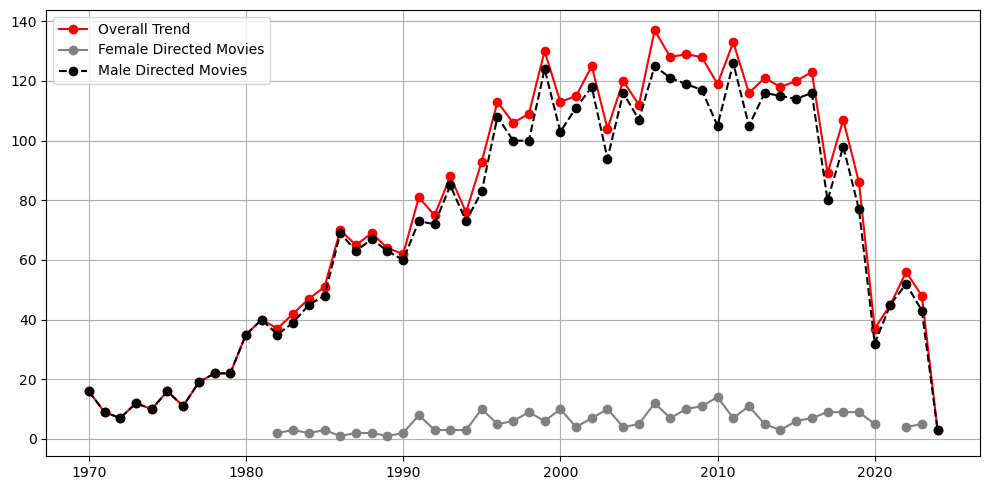

In [382]:
# Plot the overall trend
plt.figure(figsize=(10, 5))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o', linestyle='-', color='red', label='Overall Trend')

# Plot male-directed movies
if 1 in release_year_gender.columns:
    plt.plot(release_year_gender.index, release_year_gender[1], marker='o', linestyle='-', color='grey', label='Female Directed Movies')

# Plot female-directed movies
if 0 in release_year_gender.columns:
    plt.plot(release_year_gender.index, release_year_gender[0], marker='o', linestyle='--', color='black', label='Male Directed Movies')

# Customize chart
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## BEFORE PSM

In [384]:
# Calculate summary statistics for 'star_power' and 'adjusted_domestic_gross'
summary_stats = df[['star_power', 'adjusted_domestic_gross','adjusted_budget']].describe().T
summary_stats['var'] = df[['star_power', 'adjusted_domestic_gross','adjusted_budget']].var()
summary_stats['skew'] = df[['star_power', 'adjusted_domestic_gross','adjusted_budget']].skew()
summary_stats['kurtosis'] = df[['star_power', 'adjusted_domestic_gross','adjusted_budget']].kurtosis()

In [385]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,var,skew,kurtosis
star_power,4129.0,362.927488,171.179928,0.0,252.9,356.2,455.4,1952.0,29302.567628,1.207952,7.205895
adjusted_domestic_gross,4129.0,61.538266,83.266127,0.0,10.5,35.9,80.5,1431.8,6933.247978,4.421917,41.543261
adjusted_budget,4129.0,50.457011,49.020716,0.0,16.6,36.3,67.5,391.8,2403.030630,1.932656,5.008460


In [386]:
summary_stats.to_csv('../results/summary_stats_before_psm.csv')

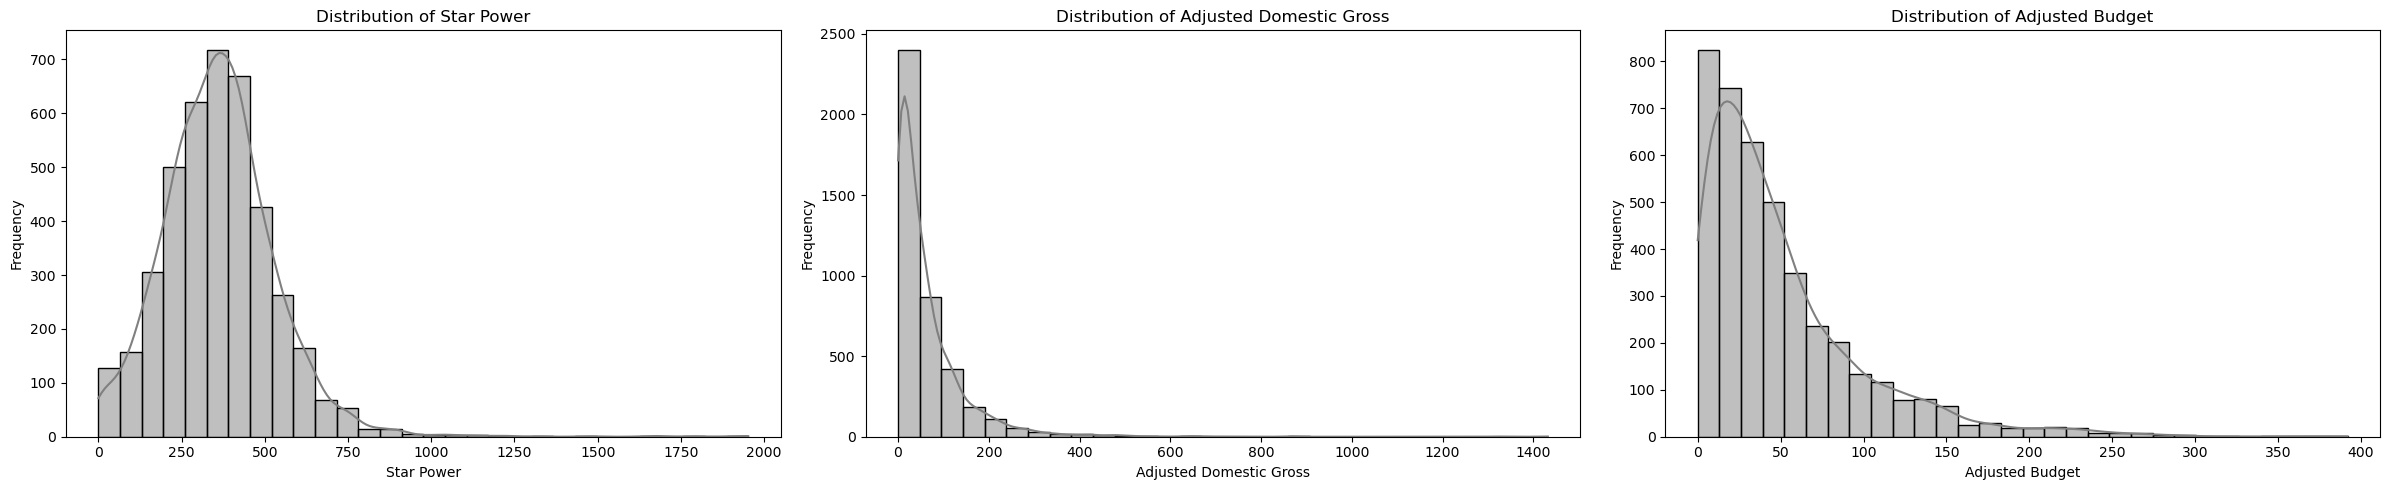

In [387]:
# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 5))

# Histogram for Star Power
sns.histplot(df['star_power'], bins=30, kde=True, ax=axes[0], color='grey')
axes[0].set_title('Distribution of Star Power')
axes[0].set_xlabel('Star Power')
axes[0].set_ylabel('Frequency')

# Histogram for Adjusted Domestic Gross
sns.histplot(df['adjusted_domestic_gross'], bins=30, kde=True, ax=axes[1], color='grey')
axes[1].set_title('Distribution of Adjusted Domestic Gross')
axes[1].set_xlabel('Adjusted Domestic Gross')
axes[1].set_ylabel('Frequency')

# Histogram for Adjusted Budget
sns.histplot(df['adjusted_budget'], bins=30, kde=True, ax=axes[2], color='grey')
axes[2].set_title('Distribution of Adjusted Budget')
axes[2].set_xlabel('Adjusted Budget')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [388]:
# Calculate the correlation between star_power and adjusted_domestic_gross
correlation = df['star_power'].corr(df['adjusted_domestic_gross'])
correlation

0.4210423648742487

In [389]:
# Calculate the correlation between adjusted_budget and adjusted_domestic_gross
correlation = df['adjusted_budget'].corr(df['adjusted_domestic_gross'])
correlation

0.4288308347205256

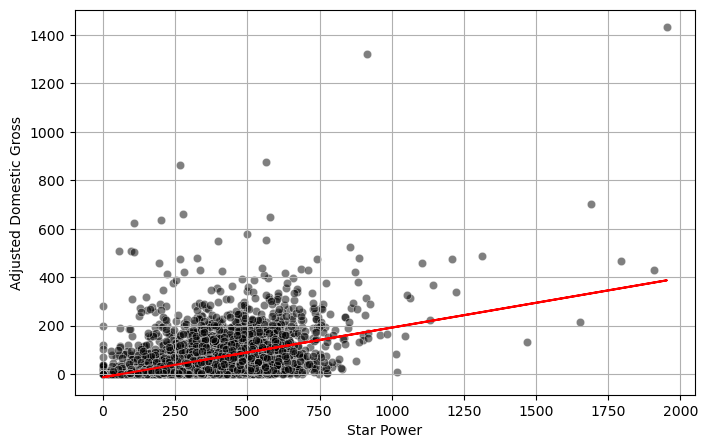

In [390]:
# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['star_power'], y=df['adjusted_domestic_gross'], alpha=0.5, color='black')

# Fit a trend line
z = np.polyfit(df['star_power'], df['adjusted_domestic_gross'], 1)
p = np.poly1d(z)
plt.plot(df['star_power'], p(df['star_power']), color='red', linestyle='-')

# Customize chart
plt.xlabel('Star Power')
plt.ylabel('Adjusted Domestic Gross')
plt.grid(True)
plt.show()

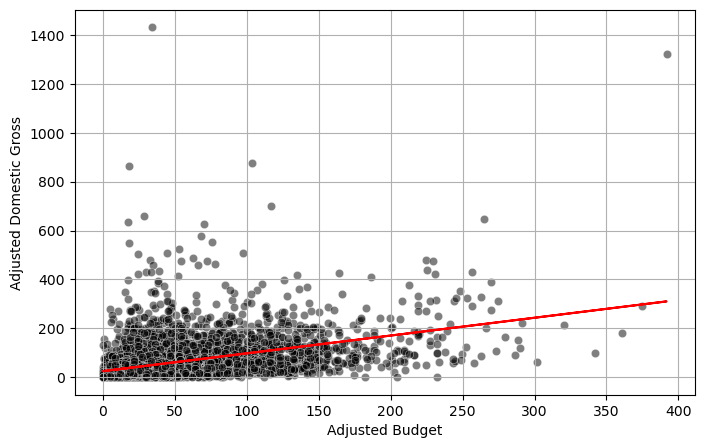

In [391]:
# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['adjusted_budget'], y=df['adjusted_domestic_gross'], alpha=0.5, color='black')

# Fit a trend line
z = np.polyfit(df['adjusted_budget'], df['adjusted_domestic_gross'], 1)
p = np.poly1d(z)
plt.plot(df['adjusted_budget'], p(df['adjusted_budget']), color='red', linestyle='-')

# Customize chart
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Domestic Gross')
plt.grid(True)
plt.show()

In [392]:
# Bar chart of the average adjusted domestic gross by director gender
avg_gross_by_gender = df.groupby('director_gender')['adjusted_domestic_gross'].mean()

In [393]:
# Bar chart of the average adjusted budget by director gender
avg_adjusted_budget_by_gender = df.groupby('director_gender')['adjusted_budget'].mean()

In [394]:
# Bar chart of the average star power by director gender
avg_star_power_by_gender = df.groupby('director_gender')['star_power'].mean()

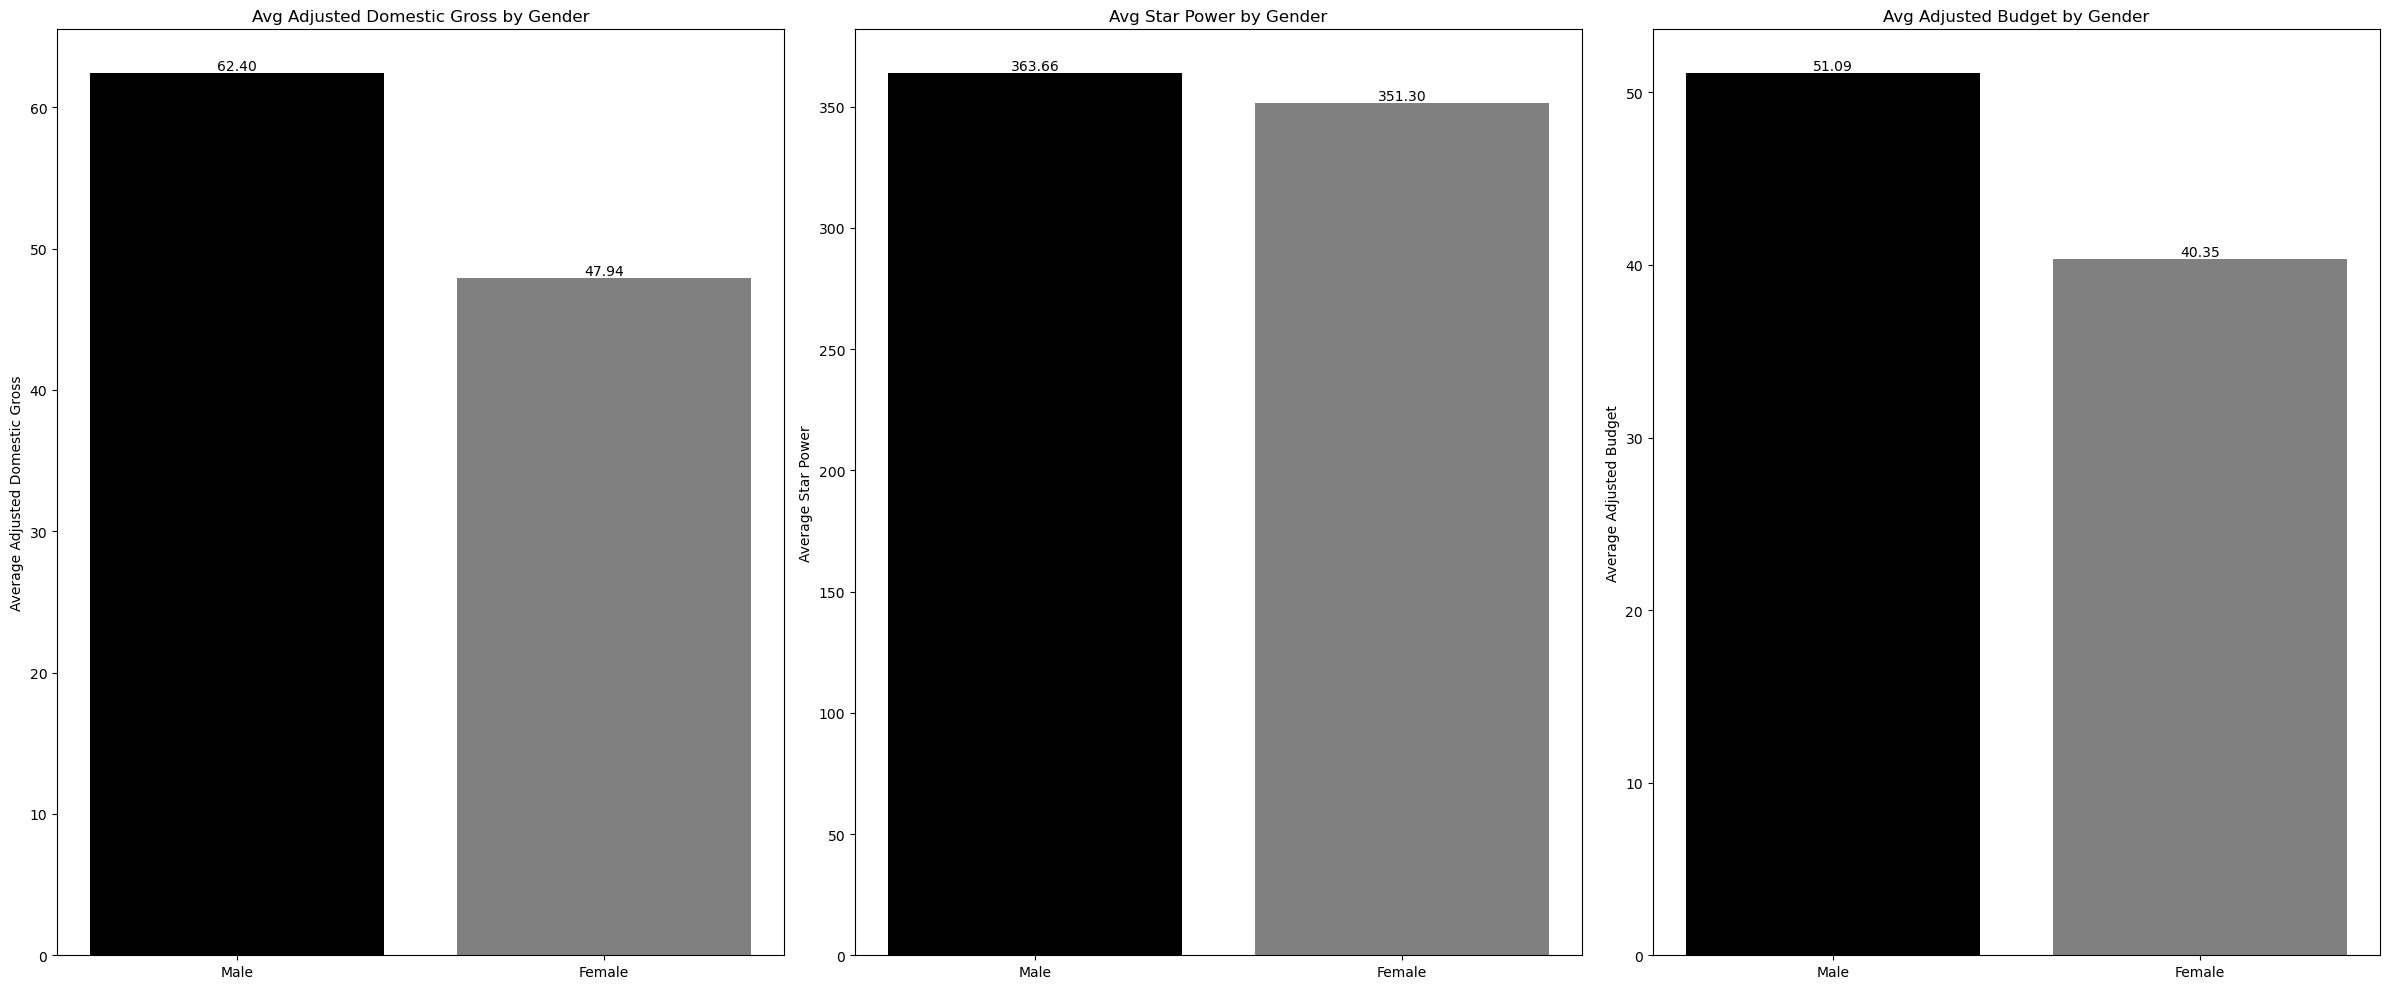

In [395]:
# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

# Bar chart of average adjusted domestic gross by director gender
bars1 = axes[0].bar(avg_gross_by_gender.index, avg_gross_by_gender.values, color=['black', 'grey'])
axes[0].set_xticks([1, 0])
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].set_ylabel('Average Adjusted Domestic Gross')
axes[0].set_title('Avg Adjusted Domestic Gross by Gender')

# Add data labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Bar chart of average star power by director gender
bars2 = axes[1].bar(avg_star_power_by_gender.index, avg_star_power_by_gender.values, color=['black', 'grey'])
axes[1].set_xticks([1, 0])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_ylabel('Average Star Power')
axes[1].set_title('Avg Star Power by Gender')

# Add data labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Bar chart of average adjusted budget by director gender
bars3 = axes[2].bar(avg_adjusted_budget_by_gender.index, avg_adjusted_budget_by_gender.values, color=['black', 'grey'])
axes[2].set_xticks([1, 0])
axes[2].set_xticklabels(['Female', 'Male'])
axes[2].set_ylabel('Average Adjusted Budget')
axes[2].set_title('Avg Adjusted Budget by Gender')

# Add data labels
for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

## PROPENSITY SCORE MATCHING

In [397]:
# Drop unnecessary columns (release_year, adjusted_domestic_gross)
df_psm = df.drop(columns=['title', 'tconst', 'release_year', 'adjusted_domestic_gross'])

In [398]:
# Define independent variables (all except director_gender)
X = df_psm.drop(columns=['director_gender'])

# Define dependent variable
y = df_psm['director_gender']

In [399]:
X

,adjusted_budget,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
0,20.3,0,64.1,2,5,4,1
1,0.0,0,16.8,1,1,1,1
2,4.9,0,0.0,1,1,2,1
3,206.5,1,123.7,2,2,1,1
4,97.2,1,55.8,1,6,1,1
...,...,...,...,...,...,...,...
4124,4.6,0,94.4,4,1,8,1
4125,30.0,1,273.3,1,1,2,0
4126,30.0,0,258.5,1,1,4,1
4127,0.0,0,0.0,1,1,1,0


In [400]:
# Standardize numeric variables for better matching
X = (X - X.mean()) / X.std()

In [401]:
# Compute Propensity Scores using Logistic Regression
logit_model = LogisticRegression(solver='liblinear')
logit_model.fit(X, y)

LogisticRegression(solver='liblinear')

In [402]:
df_psm['propensity_score'] = logit_model.predict_proba(X)[:, 1]

In [403]:
# Perform Nearest Neighbor Matching
treated = df_psm[df_psm['director_gender'] == 1]  # Female-directed movies
control = df_psm[df_psm['director_gender'] == 0]  # Male-directed movies

In [404]:
# Use Nearest Neighbors to match each treated observation with one control observation
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(control[['propensity_score']])

NearestNeighbors(metric='euclidean', n_neighbors=1)

In [405]:
distances, indices = nn.kneighbors(treated[['propensity_score']])

In [406]:
matched_control_idx = indices.flatten()

In [407]:
# Get matched control units
matched_control = control.iloc[matched_control_idx].reset_index(drop=True)
matched_treated = treated.reset_index(drop=True)

In [408]:
# Combine matched dataset
matched_df = pd.concat([matched_treated, matched_control])

In [409]:
matched_df

,adjusted_budget,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes,propensity_score
0,1.0,1,0,0.0,1,1,1,1,0.047073
1,14.7,1,0,589.7,1,1,2,0,0.097123
2,37.9,1,1,228.8,2,1,3,0,0.085524
3,4.7,1,0,241.3,1,1,3,1,0.044143
4,1.1,1,0,201.8,1,1,2,0,0.095663
...,...,...,...,...,...,...,...,...,...
240,44.0,0,0,366.7,2,1,3,0,0.088053
241,49.8,0,0,312.0,1,1,4,1,0.036943
242,33.2,0,0,442.5,1,1,4,1,0.039748
243,12.8,0,1,402.2,1,1,3,0,0.088650


In [410]:
# Identify unmatched control units using original index
unmatched_control = control.drop(control.index[matched_control_idx])

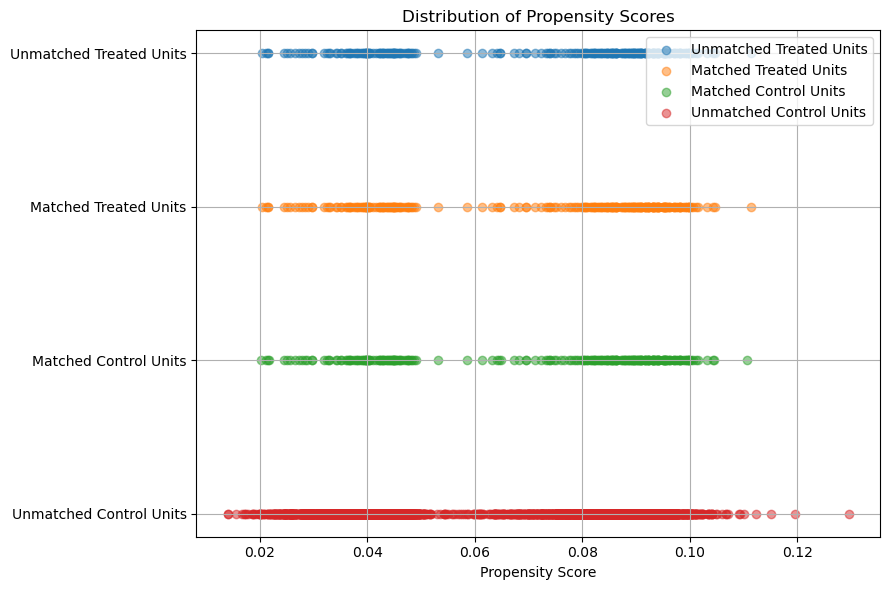

In [411]:
# Propensity Score Distribution Plot
plt.figure(figsize=(9, 6))
plt.title("Distribution of Propensity Scores")

plt.scatter(treated['propensity_score'], [3]*len(treated), alpha=0.5, label='Unmatched Treated Units')
plt.scatter(matched_treated['propensity_score'], [2]*len(matched_treated), alpha=0.5, label='Matched Treated Units')
plt.scatter(matched_control['propensity_score'], [1]*len(matched_control), alpha=0.5, label='Matched Control Units')
plt.scatter(unmatched_control['propensity_score'], [0]*len(unmatched_control), alpha=0.5, label='Unmatched Control Units')

plt.yticks(
    [0, 1, 2, 3],
    ['Unmatched Control Units', 'Matched Control Units', 'Matched Treated Units', 'Unmatched Treated Units']
)
plt.xlabel("Propensity Score")
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [412]:
# Calculate SMDs before and after matching
smd_data = []

for col in X.columns:
    # Pre-matching (All)
    mean_treated_all = treated[col].mean()
    mean_control_all = control[col].mean()
    std_pooled_all = ((treated[col].std() ** 2 + control[col].std() ** 2) / 2) ** 0.5
    smd_all = (mean_treated_all - mean_control_all) / std_pooled_all

    # Post-matching (Matched)
    mean_treated_matched = matched_treated[col].mean()
    mean_control_matched = matched_control[col].mean()
    std_pooled_matched = ((matched_treated[col].std() ** 2 + matched_control[col].std() ** 2) / 2) ** 0.5
    smd_matched = (mean_treated_matched - mean_control_matched) / std_pooled_matched

    smd_data.append((col, smd_all, smd_matched))

In [413]:
# Create DataFrame
smd_df = pd.DataFrame(smd_data, columns=['Covariate', 'SMD_All', 'SMD_Matched']).set_index('Covariate')

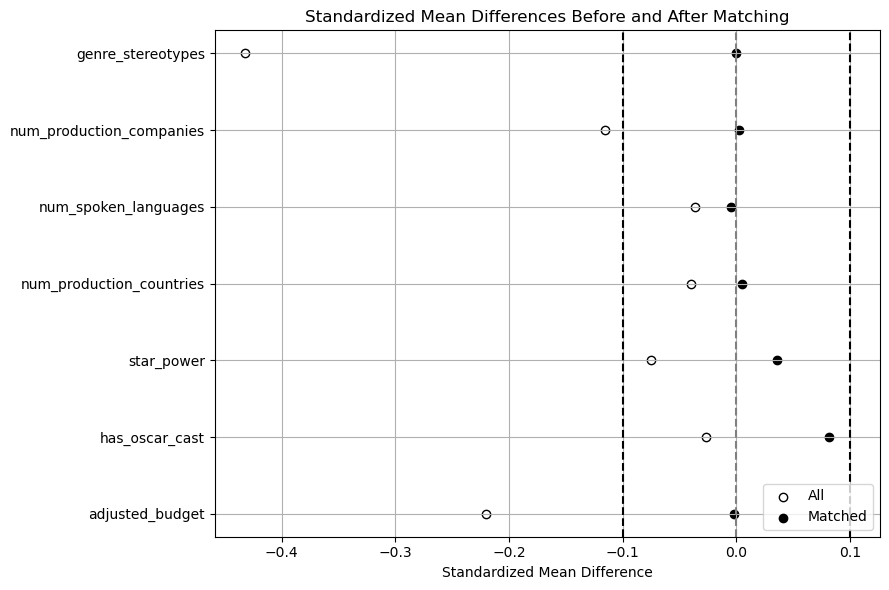

In [414]:
# Plot
plt.figure(figsize=(9, 6))
plt.axvline(x=0, color='gray', linestyle='--')
plt.axvline(x=-0.1, color='black', linestyle='--')
plt.axvline(x=0.1, color='black', linestyle='--')

plt.scatter(smd_df['SMD_All'], smd_df.index, color='white', edgecolor='black', label='All')
plt.scatter(smd_df['SMD_Matched'], smd_df.index, color='black', label='Matched')

plt.title("Standardized Mean Differences Before and After Matching")
plt.xlabel("Standardized Mean Difference")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [415]:
# Summary of Balance for All Data
balance_all = []

for col in X.columns:
    treated_mean = treated[col].mean()
    control_mean = control[col].mean()
    smd = (treated_mean - control_mean) / np.sqrt((treated[col].var() + control[col].var()) / 2)
    var_ratio = treated[col].var() / control[col].var() if control[col].var() != 0 else np.nan
    balance_all.append([col, treated_mean, control_mean, smd, var_ratio])

df_balance_all = pd.DataFrame(balance_all, columns=["Covariate", "Means Treated", "Means Control", "Std. Mean Diff.", "Var. Ratio"])

In [416]:
df_balance_all

,Covariate,Means Treated,Means Control,Std. Mean Diff.,Var. Ratio
0,adjusted_budget,40.348571,51.094645,-0.220129,0.986717
1,has_oscar_cast,0.302041,0.314109,-0.026113,0.982256
2,star_power,351.304490,363.660659,-0.075081,0.830047
3,num_production_countries,1.412245,1.447219,-0.040169,0.862946
4,num_spoken_languages,1.424490,1.456488,-0.036017,0.894411
5,num_production_companies,3.138776,3.372039,-0.115823,0.668819
6,genre_stereotypes,0.346939,0.557415,-0.432221,0.921926


In [417]:
# Summary of Balance for Matched Data
balance_matched = []

for col in X.columns:
    treated_mean = matched_treated[col].mean()
    control_mean = matched_control[col].mean()
    smd = (treated_mean - control_mean) / np.sqrt((matched_treated[col].var() + matched_control[col].var()) / 2)
    var_ratio = matched_treated[col].var() / matched_control[col].var() if matched_control[col].var() != 0 else np.nan
    balance_matched.append([col, treated_mean, control_mean, smd, var_ratio])

df_balance_matched = pd.DataFrame(balance_matched, columns=["Covariate", "Means Treated", "Means Control", "Std. Mean Diff.", "Var. Ratio"])

In [418]:
df_balance_matched

,Covariate,Means Treated,Means Control,Std. Mean Diff.,Var. Ratio
0,adjusted_budget,40.348571,40.422041,-0.001617,1.345692
1,has_oscar_cast,0.302041,0.265306,0.081392,1.081538
2,star_power,351.304490,345.920408,0.035977,1.214756
3,num_production_countries,1.412245,1.408163,0.005100,1.213761
4,num_spoken_languages,1.424490,1.428571,-0.004487,0.819158
5,num_production_companies,3.138776,3.134694,0.002172,0.852482
6,genre_stereotypes,0.346939,0.346939,0.000000,1.000000


In [419]:
# Percent Balance Improvement
improvement = []

for i in range(len(X.columns)):
    col = X.columns[i]
    smd_all = df_balance_all.loc[i, "Std. Mean Diff."]
    smd_matched = df_balance_matched.loc[i, "Std. Mean Diff."]
    improvement_percent = 100 * (abs(smd_all) - abs(smd_matched)) / abs(smd_all) if smd_all != 0 else np.nan
    improvement.append([col, smd_all, smd_matched, improvement_percent])

df_improvement = pd.DataFrame(improvement, columns=["Covariate", "SMD Before", "SMD After", "Percent Improvement"])

In [420]:
df_improvement

,Covariate,SMD Before,SMD After,Percent Improvement
0,adjusted_budget,-0.220129,-0.001617,99.265206
1,has_oscar_cast,-0.026113,0.081392,-211.691450
2,star_power,-0.075081,0.035977,52.083055
3,num_production_countries,-0.040169,0.005100,87.303253
4,num_spoken_languages,-0.036017,-0.004487,87.542717
5,num_production_companies,-0.115823,0.002172,98.124993
6,genre_stereotypes,-0.432221,0.000000,100.000000


In [421]:
# Sample Sizes
sample_sizes = {
    "All": [len(control), len(treated)],
    "Matched": [len(matched_control), len(matched_treated)],
    "Unmatched": [len(control) - len(matched_control), len(treated) - len(matched_treated)],
    "Discarded": [0, 0]
}
df_sample_sizes = pd.DataFrame(sample_sizes, index=["Control", "Treated"]).T

In [422]:
df_sample_sizes

,Control,Treated
All,3884,245
Matched,245,245
Unmatched,3639,0
Discarded,0,0


In [423]:
matched_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 490 entries, 0 to 244
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   adjusted_budget           490 non-null    float64
 1   director_gender           490 non-null    int64  
 2   has_oscar_cast            490 non-null    int64  
 3   star_power                490 non-null    float64
 4   num_production_countries  490 non-null    int64  
 5   num_spoken_languages      490 non-null    int64  
 6   num_production_companies  490 non-null    int64  
 7   genre_stereotypes         490 non-null    int64  
 8   propensity_score          490 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 38.3 KB


In [424]:
matched_df.loc[matched_df['director_gender'] == 1]

,adjusted_budget,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes,propensity_score
0,1.0,1,0,0.0,1,1,1,1,0.047073
1,14.7,1,0,589.7,1,1,2,0,0.097123
2,37.9,1,1,228.8,2,1,3,0,0.085524
3,4.7,1,0,241.3,1,1,3,1,0.044143
4,1.1,1,0,201.8,1,1,2,0,0.095663
...,...,...,...,...,...,...,...,...,...
240,31.0,1,1,358.3,1,2,2,0,0.088048
241,42.3,1,0,207.5,2,2,6,1,0.036939
242,33.5,1,0,448.8,1,1,4,1,0.039748
243,11.7,1,0,190.6,1,1,3,0,0.088650


In [425]:
matched_df.loc[matched_df['director_gender'] == 0]

,adjusted_budget,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes,propensity_score
0,9.9,0,0,184.7,1,1,1,1,0.047069
1,5.8,0,0,321.8,1,2,2,0,0.097130
2,11.3,0,0,61.5,1,3,4,0,0.085510
3,14.7,0,0,156.2,1,1,2,1,0.044140
4,4.4,0,0,396.5,1,3,3,0,0.095658
...,...,...,...,...,...,...,...,...,...
240,44.0,0,0,366.7,2,1,3,0,0.088053
241,49.8,0,0,312.0,1,1,4,1,0.036943
242,33.2,0,0,442.5,1,1,4,1,0.039748
243,12.8,0,1,402.2,1,1,3,0,0.088650


In [426]:
# Identify common columns for merging
common_columns = list(set(df.columns) & set(matched_df.columns))

In [427]:
matched_df_with_details = matched_df.merge(
    df[['tconst', 'title', 'release_year', 'adjusted_domestic_gross'] + common_columns],
    on=common_columns,
    how='left'
)

In [428]:
matched_df_with_details

,adjusted_budget,director_gender,has_oscar_cast,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes,propensity_score,tconst,title,release_year,adjusted_domestic_gross
0,1.0,1,0,0.0,1,1,1,1,0.047073,tt0083590,the atomic cafe,1982,0.1
1,14.7,1,0,589.7,1,1,2,0,0.097123,tt0083929,fast times at ridgemont high,1982,88.3
2,37.9,1,1,228.8,2,1,3,0,0.085524,tt0086619,yentl,1983,123.1
3,4.7,1,0,241.3,1,1,3,1,0.044143,tt0086429,testament,1983,4.9
4,1.1,1,0,201.8,1,1,2,0,0.095663,tt0086525,valley girl,1983,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,44.0,0,0,366.7,2,1,3,0,0.088053,tt1127896,taking woodstock,2009,10.9
486,49.8,0,0,312.0,1,1,4,1,0.036943,tt2304933,the th wave,2016,45.7
487,33.2,0,0,442.5,1,1,4,1,0.039748,tt3530002,the night before,2015,57.1
488,12.8,0,1,402.2,1,1,3,0,0.088650,tt2062700,song to song,2017,0.6


In [429]:
matched_df_with_details.duplicated().any()

True

In [430]:
# Define the desired column order
column_order = [
    "tconst", "title", "release_year", "adjusted_domestic_gross", 
     "director_gender", "has_oscar_cast", 
    "propensity_score"
]

In [431]:
# Identify genre columns dynamically
genre_columns = [col for col in matched_df_with_details.columns if col not in column_order]

In [432]:
# Reorder the dataframe
matched_df_reordered = matched_df_with_details[column_order + genre_columns]

In [433]:
matched_df_reordered

,tconst,title,release_year,adjusted_domestic_gross,director_gender,has_oscar_cast,propensity_score,adjusted_budget,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
0,tt0083590,the atomic cafe,1982,0.1,1,0,0.047073,1.0,0.0,1,1,1,1
1,tt0083929,fast times at ridgemont high,1982,88.3,1,0,0.097123,14.7,589.7,1,1,2,0
2,tt0086619,yentl,1983,123.1,1,1,0.085524,37.9,228.8,2,1,3,0
3,tt0086429,testament,1983,4.9,1,0,0.044143,4.7,241.3,1,1,3,1
4,tt0086525,valley girl,1983,53.0,1,0,0.095663,1.1,201.8,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,tt1127896,taking woodstock,2009,10.9,0,0,0.088053,44.0,366.7,2,1,3,0
486,tt2304933,the th wave,2016,45.7,0,0,0.036943,49.8,312.0,1,1,4,1
487,tt3530002,the night before,2015,57.1,0,0,0.039748,33.2,442.5,1,1,4,1
488,tt2062700,song to song,2017,0.6,0,1,0.088650,12.8,402.2,1,1,3,0


In [434]:
matched_df_reordered.loc[matched_df_reordered['director_gender'] == 1]

,tconst,title,release_year,adjusted_domestic_gross,director_gender,has_oscar_cast,propensity_score,adjusted_budget,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
0,tt0083590,the atomic cafe,1982,0.1,1,0,0.047073,1.0,0.0,1,1,1,1
1,tt0083929,fast times at ridgemont high,1982,88.3,1,0,0.097123,14.7,589.7,1,1,2,0
2,tt0086619,yentl,1983,123.1,1,1,0.085524,37.9,228.8,2,1,3,0
3,tt0086429,testament,1983,4.9,1,0,0.044143,4.7,241.3,1,1,3,1
4,tt0086525,valley girl,1983,53.0,1,0,0.095663,1.1,201.8,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,tt9185206,are you there god its me margaret,2023,21.0,1,1,0.088048,31.0,358.3,1,2,2,0
241,tt13923456,mafia mamma,2023,3.6,1,0,0.036939,42.3,207.5,2,2,6,1
242,tt14209916,cocaine bear,2023,66.7,1,0,0.039748,33.5,448.8,1,1,4,1
243,tt17527468,bottoms,2023,12.4,1,0,0.088650,11.7,190.6,1,1,3,0


In [435]:
matched_df_reordered.loc[matched_df_reordered['director_gender'] == 0]

,tconst,title,release_year,adjusted_domestic_gross,director_gender,has_oscar_cast,propensity_score,adjusted_budget,star_power,num_production_countries,num_spoken_languages,num_production_companies,genre_stereotypes
245,tt0200469,bats,1999,19.2,0,0,0.047069,9.9,184.7,1,1,1,1
246,tt0147612,happiness,1998,5.3,0,0,0.097130,5.8,321.8,1,2,2,0
247,tt0404030,everything is illuminated,2005,2.7,0,0,0.085510,11.3,61.5,1,3,4,0
248,tt0084684,silent rage,1982,34.2,0,0,0.044140,14.7,156.2,1,1,2,1
249,tt0762105,i hate valentines day,2009,0.0,0,0,0.095658,4.4,396.5,1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,tt1127896,taking woodstock,2009,10.9,0,0,0.088053,44.0,366.7,2,1,3,0
486,tt2304933,the th wave,2016,45.7,0,0,0.036943,49.8,312.0,1,1,4,1
487,tt3530002,the night before,2015,57.1,0,0,0.039748,33.2,442.5,1,1,4,1
488,tt2062700,song to song,2017,0.6,0,1,0.088650,12.8,402.2,1,1,3,0


In [436]:
# Prepare features and target
X_logit = df.drop(columns=['tconst', 'title', 'release_year', 'adjusted_domestic_gross', 'director_gender'])
y_logit = df['director_gender']

In [437]:
# Add constant
X_logit_const = sm.add_constant(X_logit)

In [438]:
# Fit binary logit model
logit_model = sm.Logit(y_logit, X_logit_const)
logit_result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.219465
         Iterations 7


In [439]:
# Print summary
print(logit_result.summary2())

                             Results: Logit
Model:                  Logit              Method:             MLE       
Dependent Variable:     director_gender    Pseudo R-squared:   0.025     
Date:                   2025-04-22 12:04   AIC:                1828.3395 
No. Observations:       4129               BIC:                1878.9459 
Df Model:               7                  Log-Likelihood:     -906.17   
Df Residuals:           4121               LL-Null:            -929.59   
Converged:              1.0000             LLR p-value:        5.9777e-08
No. Iterations:         7.0000             Scale:              1.0000    
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                    -2.2738   0.2167 -10.4907 0.0000 -2.6986 -1.8490
adjusted_budget          -0.0034   0.0019  -1.7623 0.0780 -0.0072  0

In [440]:
matched_df_reordered.to_csv('../results/after_psm.csv')

## AFTER PSM

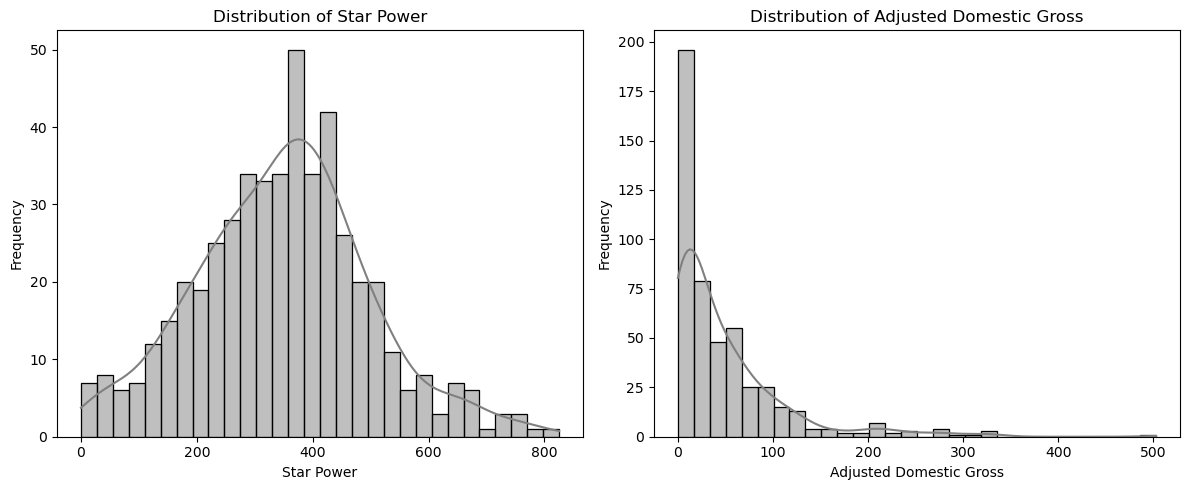

In [442]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Star Power
sns.histplot(matched_df_reordered['star_power'], bins=30, kde=True, ax=axes[0], color='grey')
axes[0].set_title('Distribution of Star Power')
axes[0].set_xlabel('Star Power')
axes[0].set_ylabel('Frequency')

# Histogram for Adjusted Domestic Gross
sns.histplot(matched_df_reordered['adjusted_domestic_gross'], bins=30, kde=True, ax=axes[1], color='grey')
axes[1].set_title('Distribution of Adjusted Domestic Gross')
axes[1].set_xlabel('Adjusted Domestic Gross')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [443]:
# Calculate summary statistics for 'star_power' and 'adjusted_domestic_gross'
summary_stats = matched_df_reordered[['star_power', 'adjusted_domestic_gross','adjusted_budget']].describe().T
summary_stats['var'] = matched_df_reordered[['star_power', 'adjusted_domestic_gross','adjusted_budget']].var()
summary_stats['skew'] = matched_df_reordered[['star_power', 'adjusted_domestic_gross','adjusted_budget']].skew()
summary_stats['kurtosis'] = matched_df_reordered[['star_power', 'adjusted_domestic_gross','adjusted_budget']].kurtosis()

In [444]:
summary_stats

,count,mean,std,min,25%,50%,75%,max,var,skew,kurtosis
star_power,490.0,348.612449,149.525775,0.0,250.375,355.10,438.70,825.4,22357.957493,0.163398,0.210269
adjusted_domestic_gross,490.0,47.977143,62.374780,0.0,6.900,25.50,64.15,502.8,3890.613137,2.654044,9.807358
adjusted_budget,490.0,40.385306,45.375267,0.0,12.575,25.05,50.05,256.5,2058.914835,2.327135,6.214512


In [445]:
summary_stats.to_csv('../results/summary_stats_after_psm.csv')

In [446]:
# Bar chart of the average adjusted domestic gross by director gender
avg_gross_by_gender_after = matched_df_reordered.groupby('director_gender')['adjusted_domestic_gross'].mean()

In [447]:
# Bar chart of the average star power by director gender
avg_star_power_by_gender_after = matched_df_reordered.groupby('director_gender')['star_power'].mean()

In [448]:
# Bar chart of the average adjusted budget by director gender
avg_adjusted_budget_by_gender_after = matched_df_reordered.groupby('director_gender')['adjusted_budget'].mean()

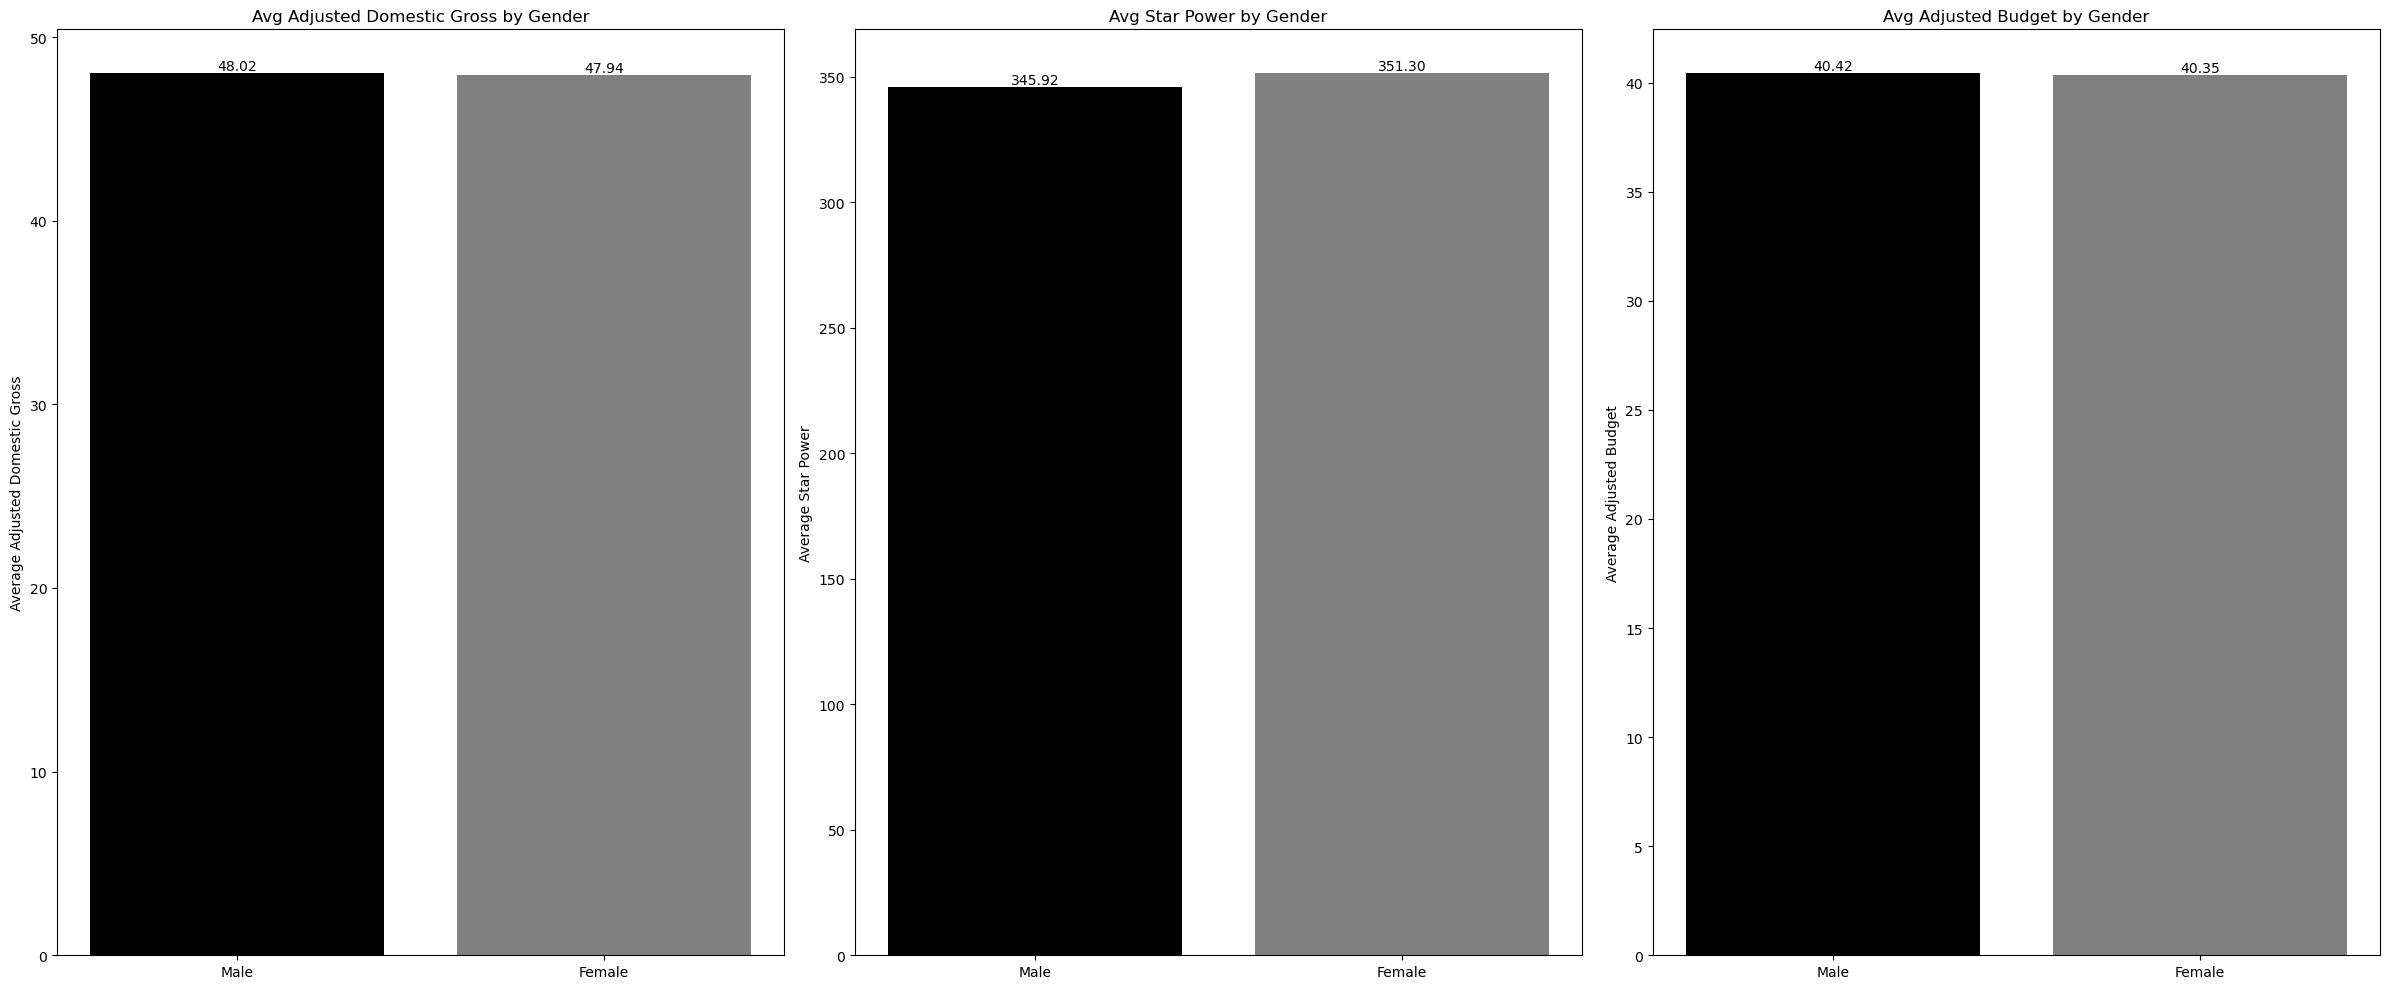

In [449]:
# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(24, 10))

# Bar chart of average adjusted domestic gross by director gender
bars1 = axes[0].bar(avg_gross_by_gender_after.index, avg_gross_by_gender_after.values, color=['black', 'grey'])
axes[0].set_xticks([1, 0])
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].set_ylabel('Average Adjusted Domestic Gross')
axes[0].set_title('Avg Adjusted Domestic Gross by Gender')

# Add data labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Bar chart of average star power by director gender
bars2 = axes[1].bar(avg_star_power_by_gender_after.index, avg_star_power_by_gender_after.values, color=['black', 'grey'])
axes[1].set_xticks([1, 0])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_ylabel('Average Star Power')
axes[1].set_title('Avg Star Power by Gender')

# Add data labels
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Bar chart of average adjusted budget by director gender
bars3 = axes[2].bar(avg_adjusted_budget_by_gender_after.index, avg_adjusted_budget_by_gender_after.values, color=['black', 'grey'])
axes[2].set_xticks([1, 0])
axes[2].set_xticklabels(['Female', 'Male'])
axes[2].set_ylabel('Average Adjusted Budget')
axes[2].set_title('Avg Adjusted Budget by Gender')

# Add data labels
for bar in bars3:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()

## COMPARE PERFORMANCE

In [451]:
before_psm = pd.read_csv('../results/before_psm.csv')
after_psm = pd.read_csv('../results/after_psm.csv')

In [452]:
# Drop the first column from both datasets
before_psm = before_psm.iloc[:, 1:]
after_psm = after_psm.iloc[:, 1:]

In [453]:
# Drop unnecessary columns from both datasets
before_psm = before_psm.drop(columns=['release_year', 'has_oscar_cast', 'propensity_score','num_spoken_languages','num_production_countries','num_production_companies'], errors='ignore')
after_psm = after_psm.drop(columns=['release_year', 'has_oscar_cast', 'propensity_score','num_spoken_languages','num_production_countries','num_production_companies'], errors='ignore')

In [454]:
def plot_genre_comparison(df, dataset_name):
    # Melt the dataframe to long format for easy plotting
    genre_columns = [col for col in df.columns if col not in ['tconst', 'title', 'release_year', 'adjusted_domestic_gross', 'director_gender','star_power','adjusted_budget']]
    df_melted = df.melt(id_vars=['director_gender', 'adjusted_domestic_gross'], value_vars=genre_columns, var_name='Genre', value_name='Is_Genre')
    
    # Filter to keep only rows where the genre is present (Is_Genre == 1)
    df_melted = df_melted[df_melted['Is_Genre'] == 1]

    # Create the boxplot comparing adjusted domestic gross across genres
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Genre', y='adjusted_domestic_gross', hue='director_gender', data=df_melted, palette={1: '#7f7f7f', 0: '#3f3f3f'})
    plt.yscale('log')  # Apply log scale to handle skewed revenue data
    plt.xlabel('Genre')
    plt.ylabel('Adjusted Domestic Gross')
    plt.title(f'Comparison of Female vs. Male-Directed Movies Across Genres - {dataset_name}')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Director Gender", labels=['Male', 'Female'])
    plt.tight_layout()
    plt.show()

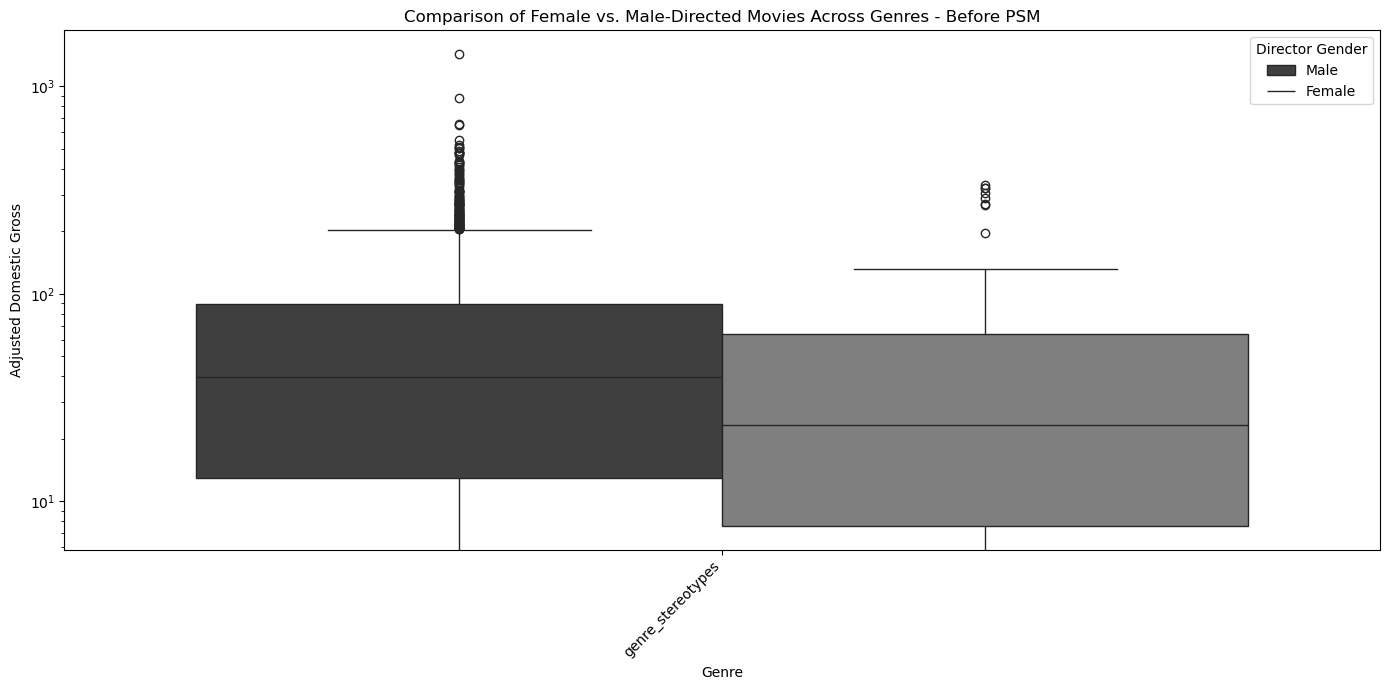

In [455]:
# Plot comparison for both datasets
plot_genre_comparison(before_psm, "Before PSM")

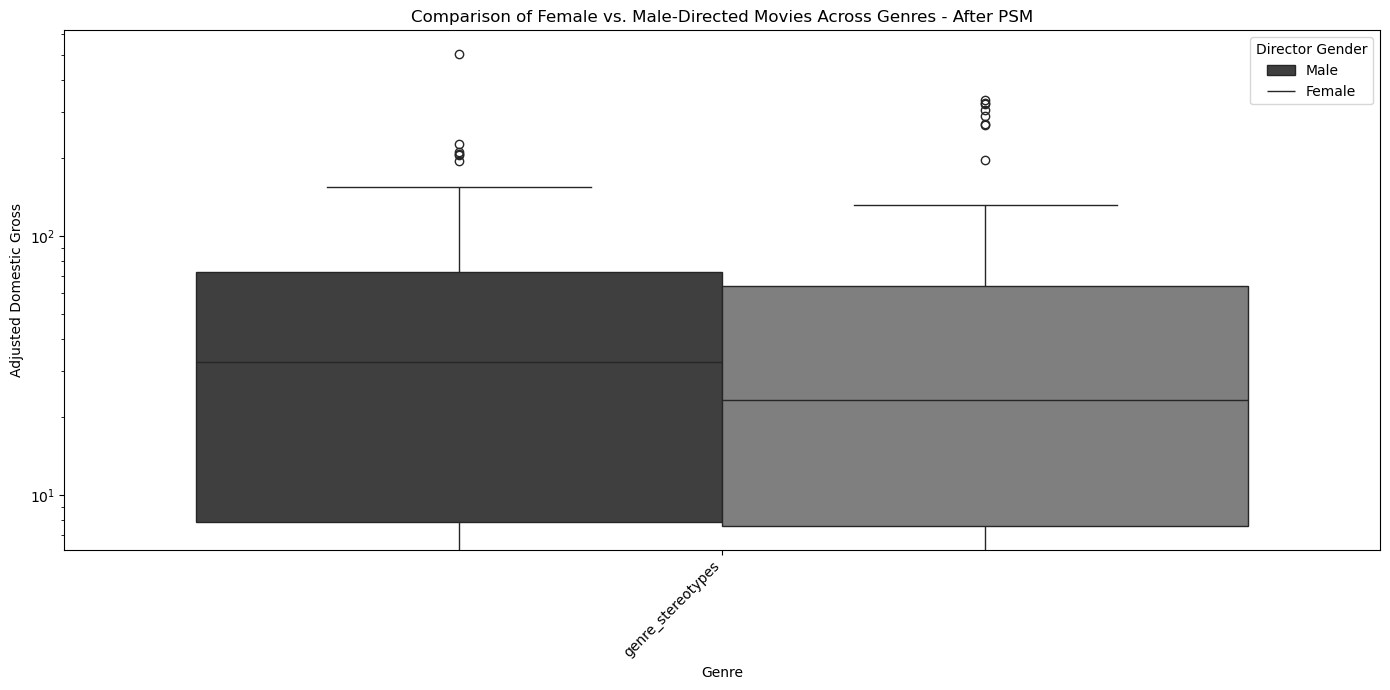

In [456]:
plot_genre_comparison(after_psm, "After PSM")

In [457]:
def compute_genre_avg_gross(df):
    # Identify genre columns, excluding 'star_power'
    genre_columns = [col for col in df.columns if col not in ['tconst', 'title', 'adjusted_domestic_gross', 'director_gender', 'star_power','adjusted_budget']]
    
    # Initialize results list
    results = []
    
    for genre in genre_columns:
        # Filter movies that belong to the genre
        genre_df = df[df[genre] == 1]
        
        # Compute average adjusted domestic gross for each gender
        avg_gross_female = genre_df[genre_df['director_gender'] == 1]['adjusted_domestic_gross'].mean()
        avg_gross_male = genre_df[genre_df['director_gender'] == 0]['adjusted_domestic_gross'].mean()
        
        # Append results
        results.append([genre, avg_gross_female, avg_gross_male])
    
    # Convert to DataFrame
    genre_avg_gross_df = pd.DataFrame(results, columns=['Genre', 'Avg_Gross_Female', 'Avg_Gross_Male'])
    
    return genre_avg_gross_df

In [458]:
before_psm_avg_gross = compute_genre_avg_gross(before_psm)

In [459]:
before_psm_avg_gross

,Genre,Avg_Gross_Female,Avg_Gross_Male
0,genre_stereotypes,57.035294,65.769654


In [460]:
after_psm_avg_gross = compute_genre_avg_gross(after_psm)

In [461]:
after_psm_avg_gross

,Genre,Avg_Gross_Female,Avg_Gross_Male
0,genre_stereotypes,57.035294,55.681176


In [462]:
avg_gross_by_gender_before = before_psm.groupby('director_gender')['adjusted_domestic_gross'].mean()

In [463]:
avg_gross_by_gender_before

director_gender
0    62.396215
1    47.937143
Name: adjusted_domestic_gross, dtype: float64

In [464]:
avg_budget_by_gender_before = before_psm.groupby('director_gender')['adjusted_budget'].mean()

In [465]:
avg_budget_by_gender_before

director_gender
0    51.094645
1    40.348571
Name: adjusted_budget, dtype: float64

In [466]:
avg_star_power_by_gender_before = before_psm.groupby('director_gender')['star_power'].mean()

In [467]:
avg_star_power_by_gender_before

director_gender
0    363.660659
1    351.304490
Name: star_power, dtype: float64

In [468]:
avg_gross_by_gender_after = after_psm.groupby('director_gender')['adjusted_domestic_gross'].mean()

In [469]:
avg_gross_by_gender_after

director_gender
0    48.017143
1    47.937143
Name: adjusted_domestic_gross, dtype: float64

In [470]:
avg_budget_by_gender_after = after_psm.groupby('director_gender')['adjusted_budget'].mean()

In [471]:
avg_budget_by_gender_after

director_gender
0    40.422041
1    40.348571
Name: adjusted_budget, dtype: float64

In [472]:
avg_star_power_by_gender_after = after_psm.groupby('director_gender')['star_power'].mean()

In [473]:
avg_star_power_by_gender_after

director_gender
0    345.920408
1    351.304490
Name: star_power, dtype: float64

## STATISTICAL ANALYSIS

In [475]:
# Apply log transformation to 'adjusted_domestic_gross' and 'star_power'
before_psm['log_adjusted_domestic_gross'] = np.log1p(before_psm['adjusted_domestic_gross'])
before_psm['log_star_power'] = np.log1p(before_psm['star_power'])
before_psm['log_adjusted_budget'] = np.log1p(before_psm['adjusted_budget'])

after_psm['log_adjusted_domestic_gross'] = np.log1p(after_psm['adjusted_domestic_gross'])
after_psm['log_star_power'] = np.log1p(after_psm['star_power'])
after_psm['log_adjusted_budget'] = np.log1p(after_psm['adjusted_budget'])

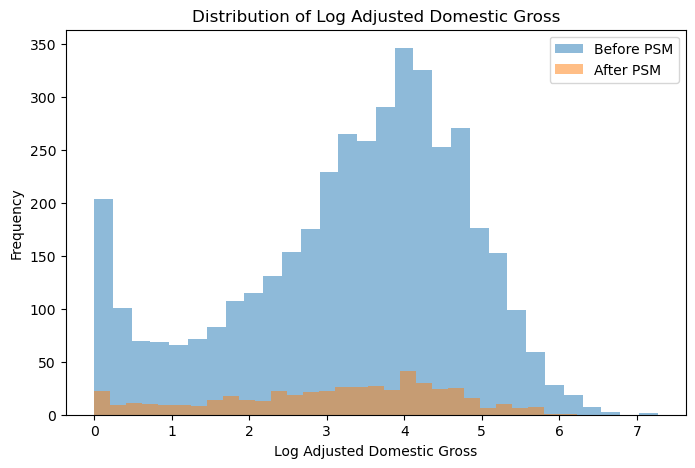

In [476]:
# Plot histogram for log_adjusted_domestic_gross
plt.figure(figsize=(8, 5))
plt.hist(before_psm['log_adjusted_domestic_gross'], bins=30, alpha=0.5, label='Before PSM')
plt.hist(after_psm['log_adjusted_domestic_gross'], bins=30, alpha=0.5, label='After PSM')
plt.xlabel('Log Adjusted Domestic Gross')
plt.ylabel('Frequency')
plt.title('Distribution of Log Adjusted Domestic Gross')
plt.legend()
plt.show()

In [477]:
# Calculate summary statistics for 'log_star_power' and 'log_adjusted_domestic_gross'
summary_stats_before = before_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].describe().T
summary_stats_before['var'] = before_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].var()
summary_stats_before['skew'] = before_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].skew()
summary_stats_before['kurtosis'] = before_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].kurtosis()

In [478]:
summary_stats_before

,count,mean,std,min,25%,50%,75%,max,var,skew,kurtosis
log_star_power,4129.0,5.720565,0.821831,0.0,5.536940,5.878296,6.123370,7.577122,0.675407,-4.156338,24.697973
log_adjusted_domestic_gross,4129.0,3.316526,1.495702,0.0,2.442347,3.608212,4.400603,7.267386,2.237124,-0.600123,-0.339764
log_adjusted_budget,4129.0,3.454994,1.117501,0.0,2.867899,3.618993,4.226834,5.973301,1.248808,-0.761774,0.514109


In [479]:
# Calculate summary statistics for 'log_star_power' and 'log_adjusted_domestic_gross'
summary_stats_after = after_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].describe().T
summary_stats_after['var'] = after_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].var()
summary_stats_after['skew'] = after_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].skew()
summary_stats_after['kurtosis'] = after_psm[['log_star_power', 'log_adjusted_domestic_gross','log_adjusted_budget']].kurtosis()

In [480]:
summary_stats_after

,count,mean,std,min,25%,50%,75%,max,var,skew,kurtosis
log_star_power,490.0,5.707307,0.704127,0.0,5.526944,5.875212,6.086093,6.717079,0.495795,-3.449244,19.969035
log_adjusted_domestic_gross,490.0,3.071405,1.460949,0.0,2.066863,3.277116,4.176691,6.222179,2.134373,-0.422206,-0.635380
log_adjusted_budget,490.0,3.170356,1.166164,0.0,2.608184,3.260016,3.932804,5.551020,1.359939,-0.600468,0.272926


In [481]:
# Remove the original columns
before_psm = before_psm.drop(columns=['adjusted_domestic_gross', 'star_power','adjusted_budget'], errors='ignore')
after_psm = after_psm.drop(columns=['adjusted_domestic_gross', 'star_power','adjusted_budget'], errors='ignore')

## CHECKING ANOVA ASSUMPTIONS

In [483]:
# Separate adjusted_domestic_gross by gender for ANOVA
male_gross_before = before_psm.loc[before_psm['director_gender'] == 0, 'log_adjusted_domestic_gross']
female_gross_before = before_psm.loc[df['director_gender'] == 1, 'log_adjusted_domestic_gross']

In [484]:
# Levene's test for homogeneity of variance
levene_test_before = stats.levene(male_gross_before, female_gross_before)

In [485]:
levene_test_before

LeveneResult(statistic=1.1463741300811334, pvalue=0.28437207105263707)

In [486]:
# Separate adjusted_domestic_gross by gender for ANOVA
male_gross_after = after_psm.loc[after_psm['director_gender'] == 0, 'log_adjusted_domestic_gross']
female_gross_after = after_psm.loc[after_psm['director_gender'] == 1, 'log_adjusted_domestic_gross']

In [487]:
# Levene's test for homogeneity of variance
levene_test_after = stats.levene(male_gross_after, female_gross_after)

In [488]:
levene_test_after

LeveneResult(statistic=1.661939169179671, pvalue=0.19795242878597663)

## ANOVA

In [490]:
# Perform ANOVA
anova_result_before = f_oneway(female_gross_before, male_gross_before)

In [491]:
anova_result_before

F_onewayResult(statistic=11.3187864589999, pvalue=0.000774268072914691)

In [492]:
# Perform ANOVA
anova_result_after = f_oneway(female_gross_after, male_gross_after)

In [493]:
anova_result_after

F_onewayResult(statistic=1.0089282125058774, pvalue=0.3156575323760513)

## CHECKING MLR ASSUMPTIONS

In [495]:
def check_assumptions(df, IVs, DV, dataset_name):
    # Prepare data for regression
    X = df[IVs]
    y = df[DV]
    X = sm.add_constant(X)  # Add intercept
    
    # Fit model
    model = sm.OLS(y, X).fit()
    residuals = model.resid
    
    # 1. P-P Plot for Normality of Residuals
    sm.qqplot(residuals, line='45')
    plt.title(f'P-P Plot of Residuals ({dataset_name})')
    plt.show()
    
    # 2. Variance Inflation Factor (VIF) for Multicollinearity
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    print(f'\n### Variance Inflation Factor (VIF) - {dataset_name} ###\n')
    print(vif_data)
    
    # 3. Kolmogorov-Smirnov (K-S) test for normality of residuals
    ks_test = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
    print(f'\n### Kolmogorov-Smirnov (K-S) Test for Normality - {dataset_name} ###\n')
    print(f'Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}')
    
    return model

In [496]:
# Define Independent Variables (IVs) and Dependent Variable (DV)
DV_column = 'log_adjusted_domestic_gross'
base_IV_columns = ['log_star_power', 'director_gender','log_adjusted_budget'] + [col for col in before_psm.columns if col in after_psm.columns and col not in ['tconst', 'title', DV_column, 'log_star_power', 'director_gender','log_adjusted_budget']]

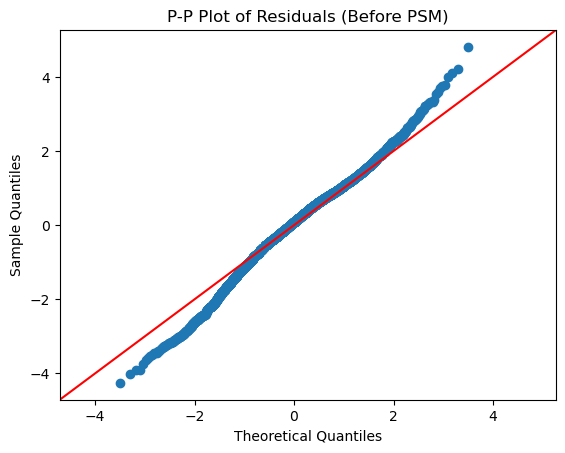


### Variance Inflation Factor (VIF) - Before PSM ###

              Variable        VIF
0                const  50.100259
1       log_star_power   1.263003
2      director_gender   1.013899
3  log_adjusted_budget   1.328017
4    genre_stereotypes   1.061899

### Kolmogorov-Smirnov (K-S) Test for Normality - Before PSM ###

Statistic: 0.03928513311043058, p-value: 5.6633576579289985e-06


In [497]:
check_assumptions(before_psm, base_IV_columns, DV_column, "Before PSM")

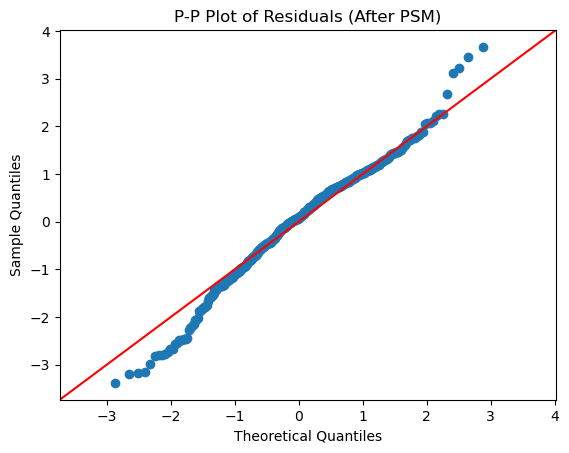


### Variance Inflation Factor (VIF) - After PSM ###

              Variable        VIF
0                const  70.219547
1       log_star_power   1.299275
2      director_gender   1.002320
3  log_adjusted_budget   1.408039
4    genre_stereotypes   1.097565

### Kolmogorov-Smirnov (K-S) Test for Normality - After PSM ###

Statistic: 0.054679215394778324, p-value: 0.10288910578137211


In [498]:
check_assumptions(after_psm, base_IV_columns, DV_column, "After PSM")

## MLR

In [500]:
# Function to run multivariate regression
def run_regression(df, IVs, DV, dataset_name):
    X = df[IVs]  # Independent variables
    y = df[DV]  # Dependent variable
    X = sm.add_constant(X)  # Add constant for intercept

    model = sm.OLS(y, X).fit(cov_type='HC3')  # Apply robust standard errors
    summary_text = model.summary().as_text()  # Convert summary to text

    print(f"\n### Multivariate Regression {dataset_name} ###\n")
    print(summary_text)

    return summary_text

In [501]:
# Function to test interaction effects
def run_interaction_regression(df, DV, dataset_name):
    # Define independent variables
    interaction_IVs = ['log_star_power', 'director_gender', 'log_adjusted_budget', 
                       'genre_stereotypes']
    
    # Create interaction term for director_gender * genre_stereotypes
    df['director_gender_genre_stereotypes'] = df['director_gender'] * df['genre_stereotypes']
    interaction_IVs.append('director_gender_genre_stereotypes')

    # Prepare X and y
    X = df[interaction_IVs]
    y = df[DV]
    X = sm.add_constant(X)
    
    # Fit model with robust SEs
    model = sm.OLS(y, X).fit(cov_type='HC3')
    summary_text = model.summary().as_text()
    print(summary_text)
    
    return summary_text

In [502]:
all_genres = [col for col in before_psm.columns if col in after_psm.columns and col not in ['tconst', 'title', DV_column, 'log_star_power', 'director_gender','log_adjusted_budget']]

### BEFORE PSM

In [504]:
summary_text = run_regression(before_psm, base_IV_columns, DV_column, "Before PSM")


### Multivariate Regression Before PSM ###

                                 OLS Regression Results                                
Dep. Variable:     log_adjusted_domestic_gross   R-squared:                       0.389
Model:                                     OLS   Adj. R-squared:                  0.389
Method:                          Least Squares   F-statistic:                     635.7
Date:                         Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                                 12:04:47   Log-Likelihood:                -6502.1
No. Observations:                         4129   AIC:                         1.301e+04
Df Residuals:                             4124   BIC:                         1.305e+04
Df Model:                                    4                                         
Covariance Type:                           HC3                                         
                          coef    std err          z      P>|z|      [0.025

In [505]:
summary_text = run_interaction_regression(before_psm, DV_column, "Before PSM")

                                 OLS Regression Results                                
Dep. Variable:     log_adjusted_domestic_gross   R-squared:                       0.390
Model:                                     OLS   Adj. R-squared:                  0.389
Method:                          Least Squares   F-statistic:                     513.2
Date:                         Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                                 12:04:47   Log-Likelihood:                -6500.4
No. Observations:                         4129   AIC:                         1.301e+04
Df Residuals:                             4123   BIC:                         1.305e+04
Df Model:                                    5                                         
Covariance Type:                           HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------

### AFTER PSM

In [507]:
summary_text = run_regression(after_psm, base_IV_columns, DV_column, "After PSM")


### Multivariate Regression After PSM ###

                                 OLS Regression Results                                
Dep. Variable:     log_adjusted_domestic_gross   R-squared:                       0.411
Model:                                     OLS   Adj. R-squared:                  0.406
Method:                          Least Squares   F-statistic:                     77.63
Date:                         Tue, 22 Apr 2025   Prob (F-statistic):           7.30e-51
Time:                                 12:04:47   Log-Likelihood:                -750.85
No. Observations:                          490   AIC:                             1512.
Df Residuals:                              485   BIC:                             1533.
Df Model:                                    4                                         
Covariance Type:                           HC3                                         
                          coef    std err          z      P>|z|      [0.025 

In [508]:
summary_text = run_interaction_regression(after_psm, DV_column, "After PSM")

                                 OLS Regression Results                                
Dep. Variable:     log_adjusted_domestic_gross   R-squared:                       0.412
Model:                                     OLS   Adj. R-squared:                  0.406
Method:                          Least Squares   F-statistic:                     63.34
Date:                         Tue, 22 Apr 2025   Prob (F-statistic):           8.82e-51
Time:                                 12:04:47   Log-Likelihood:                -750.37
No. Observations:                          490   AIC:                             1513.
Df Residuals:                              484   BIC:                             1538.
Df Model:                                    5                                         
Covariance Type:                           HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------